# PROJEKT PREDYKCJI CEN MIESZKAN W OPARCIU O DANE OTODOM Z DNIA 15 KWIETNIA 2019 ROKU
### Jadwiga Szafranek

## Pozyskanie danych

ponizej kod, ktory sluzyl do pozyskania danych strony OtoDom

In [0]:
# import scrapy
# from scrapy.crawler import CrawlerProcess
# from bs4 import BeautifulSoup
# import requests

# class OtodomBot(scrapy.Spider):
#     name = "otodom_scraper"
#     def start_requests(self):
#         base = "https://www.otodom.pl/sprzedaz/mieszkanie/katowice/?nrAdsPerPage=72&page="
#         for page_number in range(1, pages_all+1):
#             url = base+str(page_number)
#             yield scrapy.Request(url=url, callback=self.parse)
#     def parse(self, response):
#         urls = response.css("div.offer-item-details > header > h3 > a::attr(href)").extract()
#         for url in urls:
#             yield scrapy.Request(url=url, callback=self.parse_one_page)
#     def parse_one_page(self, response):
#         price = response.css("#root > div > article > header > div.css-15n3v4t-AdHeader-className > div.css-7ryazv-AdHeader-className::text").extract_first()
#         details = response.css("#root > div > article > div.css-k68zts-AdPageTemplate-className > div.css-b8lhu7-AdPageTemplate-className > section.section-overview > div.css-1v9yl6n-AdOverview-className > ul > li").extract()
#         if price is not None:
#             record = {"price": price,
#                   "details": details,
#                   "url": response.request.url}
#             real_estates.append(record)
# real_estates = [] 
# pages_all = 2000  
# process = CrawlerProcess()
# process.crawl(OtodomBot)
# process.start()

po sciagnieciu danych zapisalam je do pliku json

In [0]:
# import json
# with open(r'nieruchomosci.json', mode ='w') as file:
#     file.write(str(real_estates))

In [0]:
import pandas as pd
import json
from google.colab import drive
drive.mount('/content/gdrive')


with open('gdrive/My Drive/projekt/nieruchomosci.json', "r") as json_file:  
    data = json_file.read().replace("'", '"')
    with open('gdrive/My Drive/projekt/nieruchomosci_v2.json', "w") as fixed_json_file:
        fixed_json_file.write(data)

data = ""
with open('gdrive/My Drive/projekt/nieruchomosci_v2.json', 'r') as json_file:  
    data = json.load(json_file)

data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


[{'details': ['<li>Powierzchnia: <strong>40 m²</strong></li>',
   '<li>Liczba pokoi: <strong>2</strong></li>',
   '<li>Rynek: <strong>pierwotny</strong></li>',
   '<li>Rodzaj zabudowy: <strong>apartamentowiec</strong></li>',
   '<li>Piętro: <strong>2</strong></li>',
   '<li>Liczba pięter: <strong>8</strong></li>',
   '<li>Materiał budynku: <strong>pustak</strong></li>',
   '<li>Okna: <strong>plastikowe</strong></li>',
   '<li>Ogrzewanie: <strong>miejskie</strong></li>',
   '<li>Rok budowy: <strong>2019</strong></li>',
   '<li>Stan wykończenia: <strong>do zamieszkania</strong></li>',
   '<li>Forma własności: <strong>pełna własność</strong></li>'],
  'price': '299 000 zł',
  'url': 'https://www.otodom.pl/oferta/kup-i-zamieszkaj-przy-dolinie-prawie-gotowe-ID3Yj8M.html#4b2b486214'},
 {'details': ['<li>Powierzchnia: <strong>48,37 m²</strong></li>',
   '<li>Liczba pokoi: <strong>3</strong></li>',
   '<li>Rynek: <strong>pierwotny</strong></li>',
   '<li>Rodzaj zabudowy: <strong>apartamentowie

In [0]:
!pip install -U pip setuptools

!pip install 'unidecode'

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.1.1)
Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (41.0.1)
     |████████████████████████████████| 245kB 2.9MB/s 


In [0]:
import re

import unidecode


key_reg = re.compile('<li>([^\:]+):\s+<strong>([^>]*)</strong></li>')

def remove_pl_chars(mystr):
    clean = unidecode.unidecode(mystr.lower())
    clean = clean.replace(' ', '_')
    clean = clean.replace('_m2', '')
    clean = clean.replace('/m2', '')
    clean = clean.replace('_zl', '')
    clean = clean.replace(',', '.')
    return clean


all = []


for item in data:
    new_item = {}
    new_item['cena'] = remove_pl_chars(item['price'])
    new_item['url'] = item['url']
    for detail in item['details']:
        result = key_reg.match(detail)
        key = remove_pl_chars(result[1])
        value = remove_pl_chars(result[2])  
        #print(f"{key} => {value}")
        new_item[key] = value
    all.append(new_item)

df = pd.DataFrame(all)
df[['cena', 'powierzchnia', 'czynsz', 'cena_za_od']] = df[['cena', 'powierzchnia', 'czynsz', 'cena_za_od']].replace('_', '').replace('', 0).astype(float)

In [0]:
df

,cena,cena_za_od,czynsz,dostepne_od,forma_wlasnosci,liczba_kondygnacji,liczba_pieter,liczba_pokoi,material_budynku,metraz_do,metraz_od,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_inwestycji,stan_wykonczenia,typ_oferowanych_nieruchomosci,url
0,299000.0,NaN,NaN,NaN,pelna_wlasnosc,NaN,8,2,pustak,NaN,NaN,miejskie,plastikowe,2,40.00,apartamentowiec,2019,pierwotny,NaN,do_zamieszkania,NaN,https://www.otodom.pl/oferta/kup-i-zamieszkaj-...
1,275709.0,NaN,NaN,NaN,NaN,NaN,10,3,NaN,NaN,NaN,miejskie,plastikowe,1,48.37,apartamentowiec,NaN,pierwotny,NaN,do_wykonczenia,NaN,https://www.otodom.pl/oferta/nowa-inwestycja-m...
2,518891.0,NaN,NaN,NaN,NaN,NaN,10,4,zelbet,NaN,NaN,miejskie,plastikowe,2,79.22,blok,NaN,pierwotny,NaN,NaN,NaN,https://www.otodom.pl/oferta/nowe-tysiaclecie-...
3,255000.0,NaN,NaN,NaN,pelna_wlasnosc,NaN,NaN,3,NaN,NaN,NaN,miejskie,plastikowe,10,50.00,apartamentowiec,2019,pierwotny,NaN,do_wykonczenia,NaN,https://www.otodom.pl/oferta/narozny-apartamen...
4,290457.0,NaN,NaN,NaN,NaN,NaN,10,3,NaN,NaN,NaN,miejskie,plastikowe,1,49.23,apartamentowiec,NaN,pierwotny,NaN,do_wykonczenia,NaN,https://www.otodom.pl/oferta/nowa-inwestycja-m...
5,270000.0,NaN,NaN,,pelna_wlasnosc,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,45.00,NaN,NaN,wtorny,NaN,NaN,NaN,https://www.otodom.pl/oferta/zarabiajace-miesz...
6,693528.0,NaN,NaN,NaN,pelna_wlasnosc,NaN,6,4,NaN,NaN,NaN,miejskie,aluminiowe,6,78.81,apartamentowiec,NaN,pierwotny,NaN,do_wykonczenia,NaN,https://www.otodom.pl/oferta/uwaga-lux-apartam...
7,627200.0,NaN,NaN,NaN,pelna_wlasnosc,NaN,6,3,NaN,NaN,NaN,miejskie,aluminiowe,6,64.00,apartamentowiec,NaN,pierwotny,NaN,do_wykonczenia,NaN,https://www.otodom.pl/oferta/zacznij-cieszyc-s...
8,337994.0,NaN,180.0,NaN,pelna_wlasnosc,NaN,4,3,NaN,NaN,NaN,miejskie,NaN,4,61.12,apartamentowiec,2019,pierwotny,NaN,do_wykonczenia,NaN,https://www.otodom.pl/oferta/nowe-rozkladowe-m...
9,636300.0,NaN,NaN,NaN,pelna_wlasnosc,NaN,6,4,NaN,NaN,NaN,miejskie,aluminiowe,6,70.70,apartamentowiec,NaN,pierwotny,NaN,do_wykonczenia,NaN,https://www.otodom.pl/oferta/lux-apartamentowi...


# CZYSZCZENIE DANYCH

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 22 columns):
cena                             2177 non-null float64
cena_za_od                       1 non-null float64
czynsz                           602 non-null float64
dostepne_od                      266 non-null object
forma_wlasnosci                  1469 non-null object
liczba_kondygnacji               1 non-null object
liczba_pieter                    1983 non-null object
liczba_pokoi                     2176 non-null object
material_budynku                 815 non-null object
metraz_do                        1 non-null object
metraz_od                        1 non-null object
ogrzewanie                       1732 non-null object
okna                             1453 non-null object
pietro                           2120 non-null object
powierzchnia                     2176 non-null float64
rodzaj_zabudowy                  1833 non-null object
rok_budowy                       977 non

### usuwam kolumny, ktore maja tylko jedna wartosc oraz kolumne z linkiem do oferty

In [0]:
dane = df.drop(['cena_za_od','liczba_kondygnacji', 'metraz_do', 'metraz_od', 'stan_inwestycji',
                      'typ_oferowanych_nieruchomosci', 'url'], axis=1)
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 15 columns):
cena                2177 non-null float64
czynsz              602 non-null float64
dostepne_od         266 non-null object
forma_wlasnosci     1469 non-null object
liczba_pieter       1983 non-null object
liczba_pokoi        2176 non-null object
material_budynku    815 non-null object
ogrzewanie          1732 non-null object
okna                1453 non-null object
pietro              2120 non-null object
powierzchnia        2176 non-null float64
rodzaj_zabudowy     1833 non-null object
rok_budowy          977 non-null object
rynek               2176 non-null object
stan_wykonczenia    1458 non-null object
dtypes: float64(3), object(12)
memory usage: 255.2+ KB


### zliczam braki w danych

In [0]:
missing_values = dane.isnull().sum()
missing_values

cena                   0
czynsz              1575
dostepne_od         1911
forma_wlasnosci      708
liczba_pieter        194
liczba_pokoi           1
material_budynku    1362
ogrzewanie           445
okna                 724
pietro                57
powierzchnia           1
rodzaj_zabudowy      344
rok_budowy          1200
rynek                  1
stan_wykonczenia     719
dtype: int64

### brakujace wartosci uzupeniam stringiem 'brak' dla kolumn, w ktorych dane sa typu object i '0' dla kolumn w ktorych dane sa liczbowe

In [0]:
columns = ['dostepne_od', 'forma_wlasnosci', 'liczba_pieter', 'liczba_pokoi', 'material_budynku', 
            'ogrzewanie', 'okna', 'pietro', 'rodzaj_zabudowy', 'rok_budowy', 'rynek', 'stan_wykonczenia' ]
for col1 in columns:
    dane[col1].fillna('brak',inplace = True)
    
columns1 = ['czynsz', 'powierzchnia']
for col in columns1:
    dane[col].fillna(0,inplace= True)

### w pierwszej kolejnosci przeanalizuje kolumny, ktore maja najmniej brakujacych wartosci

In [0]:
dane['liczba_pokoi'].value_counts()

2                844
3                688
4                350
1                170
5                 57
7                 29
8                 25
6                  7
wiecej_niz_10      4
10                 1
9                  1
brak               1
Name: liczba_pokoi, dtype: int64

In [0]:
dane[dane['liczba_pokoi'] == 'brak']

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
1050,0.0,0.0,brak,brak,brak,brak,brak,brak,brak,brak,0.0,brak,brak,brak,brak


In [0]:
dane['cena'].value_counts()

699000.0    31
540000.0    28
299000.0    24
394200.0    24
259000.0    24
258500.0    24
295000.0    23
280000.0    19
283000.0    19
285000.0    19
279000.0    19
560000.0    18
277500.0    17
499500.0    16
380000.0    15
222360.0    15
370000.0    15
246000.0    14
700000.0    14
270000.0    13
320000.0    13
195000.0    13
280350.0    11
249000.0    11
264069.0    11
222900.0    11
450000.0    11
239000.0    11
149000.0    10
315000.0    10
            ..
555000.0     1
521364.0     1
294000.0     1
675000.0     1
308358.0     1
324738.0     1
320705.0     1
267462.0     1
333000.0     1
239205.0     1
144001.0     1
333057.0     1
265472.0     1
227370.0     1
395600.0     1
318000.0     1
312566.0     1
723433.0     1
369900.0     1
244328.0     1
417000.0     1
392417.0     1
229999.0     1
267484.0     1
273624.0     1
327500.0     1
324000.0     1
608000.0     1
312525.0     1
0.0          1
Name: cena, Length: 958, dtype: int64

### powyzsza analiza wskazuje, ze w danych jest jeden rekord, ktory nia posiada zadnych danych - we wszystkich kolumnach braki lub zera. W zwiazku z tym usuwam go z danych.

In [0]:
dane.drop(dane[(dane['cena'] == 0)].index,inplace = True)
dane['cena'].value_counts()

699000.0    31
540000.0    28
394200.0    24
259000.0    24
258500.0    24
299000.0    24
295000.0    23
285000.0    19
279000.0    19
280000.0    19
283000.0    19
560000.0    18
277500.0    17
499500.0    16
370000.0    15
380000.0    15
222360.0    15
246000.0    14
700000.0    14
270000.0    13
195000.0    13
320000.0    13
249000.0    11
280350.0    11
450000.0    11
222900.0    11
264069.0    11
239000.0    11
315000.0    10
365000.0    10
            ..
328860.0     1
555000.0     1
521364.0     1
294000.0     1
675000.0     1
308358.0     1
267462.0     1
333000.0     1
239205.0     1
312525.0     1
789000.0     1
144001.0     1
333057.0     1
265472.0     1
227370.0     1
395600.0     1
318000.0     1
312566.0     1
723433.0     1
369900.0     1
244328.0     1
417000.0     1
392417.0     1
229999.0     1
267484.0     1
273624.0     1
327500.0     1
324000.0     1
608000.0     1
411648.0     1
Name: cena, Length: 957, dtype: int64

In [0]:
dane['liczba_pokoi'].value_counts()

2                844
3                688
4                350
1                170
5                 57
7                 29
8                 25
6                  7
wiecej_niz_10      4
10                 1
9                  1
Name: liczba_pokoi, dtype: int64

### liczbe pokoi wieksza niz 10 zamieniam na 11 a dane w kolumnie na int

In [0]:
dane['liczba_pokoi'] = dane['liczba_pokoi'].replace('wiecej_niz_10', '11').astype(int)

In [0]:
dane['liczba_pokoi'].value_counts()

2     844
3     688
4     350
1     170
5      57
7      29
8      25
6       7
11      4
9       1
10      1
Name: liczba_pokoi, dtype: int64

### sprawdzam czy usuniecie wiersza w ktorym wszystkie wartosci byly brakami wyeliminowalo pojedyncze braki w danych

In [0]:
dane[dane['powierzchnia'] == 0]

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia


In [0]:
dane[dane['rynek']== 'brak']

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia


In [0]:
dane['rynek'].value_counts()

pierwotny    1195
wtorny        981
Name: rynek, dtype: int64

### kolejna kolumna w ktorej jest stosunkowo malo brakow jest pietro a nastepnie liczba pieter

In [0]:
dane['pietro'].value_counts()

1           425
parter      423
2           335
3           320
4           197
5           102
&gt;_10      67
6            63
8            61
brak         56
7            54
10           42
9            29
suterena      1
poddasze      1
Name: pietro, dtype: int64

In [0]:
dane[dane['pietro'] =='&gt;_10']

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
28,229999.0,250.0,,pelna_wlasnosc,18,2,inne,miejskie,plastikowe,&gt;_10,51.00,blok,1978,wtorny,do_zamieszkania
45,299000.0,0.0,,pelna_wlasnosc,14,2,brak,brak,brak,&gt;_10,47.20,brak,brak,wtorny,brak
50,369000.0,670.0,brak,brak,12,3,brak,brak,plastikowe,&gt;_10,70.00,blok,brak,wtorny,do_remontu
123,245000.0,470.0,,pelna_wlasnosc,15,2,brak,miejskie,plastikowe,&gt;_10,53.70,blok,brak,wtorny,do_remontu
154,330000.0,0.0,brak,brak,18,2,brak,miejskie,plastikowe,&gt;_10,53.00,blok,brak,wtorny,brak
156,370000.0,500.0,,spoldzielcze_wl._z_kw,13,3,wielka_plyta,miejskie,plastikowe,&gt;_10,59.00,blok,brak,wtorny,do_zamieszkania
168,304900.0,0.0,,brak,brak,2,brak,miejskie,plastikowe,&gt;_10,61.19,blok,brak,wtorny,do_wykonczenia
173,375000.0,800.0,brak,spoldzielcze_wlasnosciowe,18,3,brak,brak,brak,&gt;_10,72.00,blok,brak,wtorny,do_zamieszkania
245,375000.0,600.0,brak,brak,18,3,brak,brak,plastikowe,&gt;_10,72.00,brak,brak,wtorny,brak
275,375000.0,0.0,brak,brak,18,3,beton,miejskie,brak,&gt;_10,72.00,blok,brak,wtorny,brak


In [0]:
dane[dane['pietro'] =='poddasze']

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
2161,162500.0,0.0,brak,brak,5,1,brak,brak,plastikowe,poddasze,65.0,kamienica,brak,wtorny,do_remontu


### pietro "&gt;_10" zamieniam na 11, parter i suterena na 0, a poddasze na 5

In [0]:
dane['pietro'] = dane['pietro'].replace('&gt;_10', '11').replace('parter', '0').replace('suterena', '0').replace('poddasze', '5')
dane['pietro'].value_counts()

1       425
0       424
2       335
3       320
4       197
5       103
11       67
6        63
8        61
brak     56
7        54
10       42
9        29
Name: pietro, dtype: int64

In [0]:
dane[dane['pietro'] == 'brak']

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
26,249000.0,180.0,brak,pelna_wlasnosc,brak,3,brak,elektryczne,plastikowe,brak,42.00,kamienica,brak,wtorny,brak
66,935000.0,0.0,brak,pelna_wlasnosc,brak,5,brak,miejskie,brak,brak,131.68,apartamentowiec,brak,pierwotny,do_wykonczenia
148,307044.0,0.0,brak,pelna_wlasnosc,brak,2,brak,brak,brak,brak,41.65,blok,2019,pierwotny,brak
150,320233.0,0.0,brak,brak,brak,3,brak,miejskie,brak,brak,51.99,blok,2019,pierwotny,brak
151,268299.0,0.0,brak,pelna_wlasnosc,brak,3,brak,brak,brak,brak,44.79,blok,2019,pierwotny,brak
229,293760.0,0.0,brak,pelna_wlasnosc,2,2,cegla,miejskie,brak,brak,45.90,apartamentowiec,2018,wtorny,do_wykonczenia
255,395000.0,0.0,brak,pelna_wlasnosc,10,2,brak,miejskie,plastikowe,brak,50.00,apartamentowiec,brak,wtorny,do_zamieszkania
280,411905.0,0.0,brak,brak,brak,3,brak,miejskie,brak,brak,63.37,apartamentowiec,brak,pierwotny,brak
311,573760.0,0.0,brak,pelna_wlasnosc,2,4,cegla,miejskie,brak,brak,89.65,apartamentowiec,2018,wtorny,do_wykonczenia
313,573760.0,0.0,brak,brak,brak,4,brak,brak,brak,brak,89.65,brak,2018,wtorny,brak


### jezeli brak danych odnosnie pietra dotyczy mieszkania w kamienicy, brak uzupelniam 4 poniewaz wiekszosc kamienic jest 4 pietrowych i uznalam ze sprzedajacy nie wskazal ze to jest mieszkanie na najwyzszym poziomie w kamienicy

In [0]:
for row in dane.index:
    if dane['pietro'][row] == 'brak' and dane['rodzaj_zabudowy'][row] == 'kamienica':
        dane['pietro'][row] = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane['pietro'].value_counts()

1       425
0       424
2       335
3       320
4       197
5       103
11       67
6        63
8        61
7        54
brak     53
10       42
9        29
4         3
Name: pietro, dtype: int64

### dla pozostalych typow zabudowy przyjelam, ze mieszkanie jest na najwyzszym pietrze

In [0]:
for row in dane.index:
    if dane['pietro'][row] == 'brak' and dane['liczba_pieter'][row] != 'brak':
        dane['pietro'][row] = dane['liczba_pieter'][row]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane['pietro'].value_counts()

1       425
0       424
2       337
3       321
4       209
5       106
11       67
8        63
6        63
7        54
10       47
9        31
brak     24
4         3
16        1
14        1
Name: pietro, dtype: int64

### pozostale braki w kolumnie pietro zamieniam na dowolna liczbe aby zamiec typ danych w kolumnie na int i zastosowac simpleImputera do uzupelnienia brakow mediana

In [0]:
dane['pietro'] = dane['pietro'].replace('brak', '50')
dane['pietro'].value_counts()

1     425
0     424
2     337
3     321
4     209
5     106
11     67
8      63
6      63
7      54
10     47
9      31
50     24
4       3
16      1
14      1
Name: pietro, dtype: int64

In [0]:
dane['pietro'] = dane['pietro'].astype(int)

In [0]:
import sklearn
from sklearn.impute import SimpleImputer

In [0]:
imp = SimpleImputer(missing_values=50, strategy='median')
dane['pietro']= imp.fit_transform(dane[['pietro']]).ravel()
dane['pietro'].value_counts()


1.0     425
0.0     424
2.0     361
3.0     321
4.0     212
5.0     106
11.0     67
8.0      63
6.0      63
7.0      54
10.0     47
9.0      31
16.0      1
14.0      1
Name: pietro, dtype: int64

### teraz analizuje braki w kolejnej kolumnie 'liczba_pieter'

In [0]:
dane['liczba_pieter'].value_counts()

4       443
5       410
10      343
brak    193
3       179
2       164
6       100
8        94
7        65
1        40
16       26
13       22
18       20
11       19
14       15
9        15
12       10
15        9
24        4
17        3
19        1
25        1
Name: liczba_pieter, dtype: int64

In [0]:
dane[dane['liczba_pieter'] == 'brak']

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
3,255000.00,0.0,brak,pelna_wlasnosc,brak,3,brak,miejskie,plastikowe,10.0,50.00,apartamentowiec,2019,pierwotny,do_wykonczenia
10,444000.00,1.0,brak,pelna_wlasnosc,brak,3,brak,miejskie,plastikowe,2.0,67.00,apartamentowiec,2020,pierwotny,do_wykonczenia
26,249000.00,180.0,brak,pelna_wlasnosc,brak,3,brak,elektryczne,plastikowe,4.0,42.00,kamienica,brak,wtorny,brak
40,308000.00,0.0,,pelna_wlasnosc,brak,2,pustak,miejskie,plastikowe,1.0,55.00,apartamentowiec,2018,wtorny,do_zamieszkania
42,560000.00,0.0,brak,brak,brak,4,brak,miejskie,plastikowe,3.0,82.28,brak,brak,pierwotny,brak
52,214000.00,0.0,brak,spoldzielcze_wl._z_kw,brak,2,brak,brak,brak,3.0,39.00,brak,brak,wtorny,brak
55,296100.00,0.0,brak,pelna_wlasnosc,brak,3,brak,brak,brak,8.0,63.00,brak,brak,wtorny,brak
66,935000.00,0.0,brak,pelna_wlasnosc,brak,5,brak,miejskie,brak,2.0,131.68,apartamentowiec,brak,pierwotny,do_wykonczenia
126,380000.00,0.0,brak,brak,brak,4,brak,brak,brak,0.0,104.00,brak,brak,wtorny,brak
136,275500.00,200.0,,pelna_wlasnosc,brak,3,wielka_plyta,miejskie,plastikowe,3.0,63.00,blok,brak,wtorny,brak


### jezeli brak w kolumnie liczba_pieter dotyczy mieszkania polozonego na pietrze 4 i ponizej, brak uzupelniam liczba 4

In [0]:
for row in dane.index:
    if dane['liczba_pieter'][row] == 'brak' and dane['pietro'][row] <= 4:
        dane['liczba_pieter'][row] = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane['liczba_pieter'].value_counts()

4       443
5       410
10      343
3       179
4       165
2       164
6       100
8        94
7        65
1        40
brak     28
16       26
13       22
18       20
11       19
14       15
9        15
12       10
15        9
24        4
17        3
19        1
25        1
Name: liczba_pieter, dtype: int64

In [0]:
dane[dane['liczba_pieter'] == 'brak']

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
3,255000.00,0.0,brak,pelna_wlasnosc,brak,3,brak,miejskie,plastikowe,10.0,50.00,apartamentowiec,2019,pierwotny,do_wykonczenia
55,296100.00,0.0,brak,pelna_wlasnosc,brak,3,brak,brak,brak,8.0,63.00,brak,brak,wtorny,brak
168,304900.00,0.0,,brak,brak,2,brak,miejskie,plastikowe,11.0,61.19,blok,brak,wtorny,do_wykonczenia
410,164651.25,0.0,brak,brak,brak,2,brak,brak,brak,8.0,40.08,brak,2010,wtorny,brak
505,245000.00,0.0,brak,pelna_wlasnosc,brak,2,brak,brak,brak,10.0,53.00,brak,brak,wtorny,brak
560,162500.00,0.0,brak,brak,brak,1,brak,brak,brak,10.0,36.00,brak,brak,wtorny,brak
612,118000.00,0.0,brak,brak,brak,1,brak,brak,brak,10.0,30.73,brak,brak,wtorny,brak
709,232000.00,0.0,brak,pelna_wlasnosc,brak,2,brak,miejskie,plastikowe,10.0,40.00,apartamentowiec,2019,pierwotny,do_wykonczenia
712,215000.00,0.0,brak,pelna_wlasnosc,brak,2,brak,miejskie,plastikowe,5.0,36.00,apartamentowiec,2019,pierwotny,do_wykonczenia
716,324000.00,0.0,brak,pelna_wlasnosc,brak,4,brak,miejskie,plastikowe,7.0,60.00,apartamentowiec,2019,pierwotny,do_wykonczenia


### jezeli brak w kolumnie liczba_pieter dotyczy mieszkania polozonego powyzej pietra 4 i ponizej 11 to brak uzupelniam liczba pieter 10 a jezeli na 11 to 11

In [0]:
for row in dane.index:
    if dane['liczba_pieter'][row] == 'brak' and dane['pietro'][row] <= 10:
        dane['liczba_pieter'][row] = 10
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane[dane['liczba_pieter'] == 'brak']

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
168,304900.0,0.0,,brak,brak,2,brak,miejskie,plastikowe,11.0,61.19,blok,brak,wtorny,do_wykonczenia
750,245000.0,400.0,brak,brak,brak,2,brak,brak,plastikowe,11.0,53.70,brak,brak,wtorny,do_remontu
786,284000.0,0.0,brak,pelna_wlasnosc,brak,2,brak,miejskie,plastikowe,11.0,45.00,apartamentowiec,2019,pierwotny,do_wykonczenia
787,306000.0,0.0,brak,pelna_wlasnosc,brak,3,brak,miejskie,plastikowe,11.0,48.00,apartamentowiec,2019,pierwotny,do_wykonczenia
821,150000.0,299.0,brak,spoldzielcze_wlasnosciowe,brak,1,brak,miejskie,plastikowe,11.0,25.50,blok,brak,wtorny,do_zamieszkania
858,230000.0,0.0,brak,brak,brak,2,brak,miejskie,plastikowe,11.0,36.00,blok,brak,wtorny,do_zamieszkania
1099,1040000.0,0.0,brak,pelna_wlasnosc,brak,5,brak,miejskie,brak,11.0,140.00,brak,brak,pierwotny,brak
1149,1040000.0,0.0,brak,pelna_wlasnosc,brak,5,brak,miejskie,brak,11.0,140.00,brak,brak,wtorny,brak
1721,202000.0,400.0,brak,brak,brak,3,inne,brak,plastikowe,11.0,38.50,blok,brak,wtorny,do_remontu
2087,650000.0,0.0,brak,pelna_wlasnosc,brak,4,brak,miejskie,brak,11.0,94.00,brak,brak,wtorny,brak


In [0]:
dane['liczba_pieter'] = dane['liczba_pieter'].replace('brak', 11)

In [0]:
dane['liczba_pieter'].value_counts()

4     443
5     410
10    343
3     179
4     165
2     164
6     100
8      94
7      65
1      40
16     26
13     22
18     20
11     19
10     18
14     15
9      15
12     10
11     10
15      9
24      4
17      3
19      1
25      1
Name: liczba_pieter, dtype: int64

In [0]:
dane['liczba_pieter'] = dane['liczba_pieter'].astype(int)

### analizuje braki w kolumnie 'rodzaj zabudowy'

In [0]:
dane['rodzaj_zabudowy'].value_counts()

apartamentowiec     1004
blok                 611
brak                 343
kamienica            182
szeregowiec           18
dom_wolnostojacy      18
Name: rodzaj_zabudowy, dtype: int64

In [0]:
dane['rok_budowy'] = dane['rok_budowy'].replace('brak', '0').astype(int)

In [0]:
brak_rodz_zab = dane[dane['rodzaj_zabudowy'] == 'brak']
brak_rodz_zab

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
5,270000.0,0.0,,pelna_wlasnosc,3,3,brak,brak,brak,3.0,45.00,brak,0,wtorny,brak
33,3614125.0,0.0,brak,pelna_wlasnosc,7,1,brak,brak,brak,2.0,35.59,brak,2021,pierwotny,brak
34,471148.0,0.0,brak,pelna_wlasnosc,7,2,brak,brak,brak,7.0,49.84,brak,2021,pierwotny,brak
38,542448.0,0.0,brak,pelna_wlasnosc,7,3,brak,brak,brak,5.0,55.96,brak,2021,pierwotny,brak
42,560000.0,0.0,brak,brak,4,4,brak,miejskie,plastikowe,3.0,82.28,brak,0,pierwotny,brak
45,299000.0,0.0,,pelna_wlasnosc,14,2,brak,brak,brak,11.0,47.20,brak,0,wtorny,brak
47,356250.5,0.0,brak,brak,7,1,brak,brak,brak,3.0,33.47,brak,2021,pierwotny,brak
52,214000.0,0.0,brak,spoldzielcze_wl._z_kw,4,2,brak,brak,brak,3.0,39.00,brak,0,wtorny,brak
55,296100.0,0.0,brak,pelna_wlasnosc,10,3,brak,brak,brak,8.0,63.00,brak,0,wtorny,brak
62,315000.0,0.0,,pelna_wlasnosc,10,4,brak,brak,brak,9.0,72.12,brak,0,wtorny,brak


In [0]:
brak_rodz_zab['liczba_pieter'].value_counts()

4     175
5      35
10     33
3      28
7      19
2      18
11      6
1       5
13      5
6       4
8       4
18      3
14      3
12      2
17      1
15      1
9       1
Name: liczba_pieter, dtype: int64

In [0]:
brak_rodz_zab[brak_rodz_zab['liczba_pieter'] <= 2]

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
68,610100.0,275.0,brak,pelna_wlasnosc,1,4,brak,inne,brak,1.0,106.01,brak,2018,pierwotny,do_wykonczenia
92,550000.0,210.0,brak,spoldzielcze_wlasnosciowe,2,4,cegla,gazowe,plastikowe,1.0,93.00,brak,0,wtorny,brak
113,156000.0,280.0,brak,pelna_wlasnosc,2,2,cegla,kotlownia,plastikowe,2.0,52.00,brak,0,wtorny,brak
183,315000.0,0.0,brak,brak,2,3,brak,brak,brak,1.0,74.60,brak,0,wtorny,brak
536,200000.0,0.0,,pelna_wlasnosc,2,1,brak,brak,brak,1.0,50.27,brak,0,wtorny,brak
698,400000.0,0.0,brak,brak,2,2,brak,brak,plastikowe,1.0,47.00,brak,2014,wtorny,brak
780,383000.0,0.0,brak,pelna_wlasnosc,1,3,cegla,brak,plastikowe,1.0,67.00,brak,0,wtorny,brak
908,599000.0,0.0,brak,pelna_wlasnosc,2,2,brak,brak,brak,1.0,72.00,brak,0,wtorny,brak
937,124000.0,0.0,brak,brak,2,1,cegla,elektryczne,plastikowe,1.0,38.80,brak,0,wtorny,do_zamieszkania
941,409000.0,0.0,brak,brak,2,3,cegla,gazowe,plastikowe,1.0,94.00,brak,2012,wtorny,do_zamieszkania


In [0]:
brak_rodz_zab['rok_budowy'].value_counts()

0       272
2019     17
2021     12
2018      7
1980      5
2020      4
2017      4
2015      2
2008      2
1970      1
1912      1
1937      1
1938      1
1939      1
1940      1
1942      1
1966      1
1981      1
1975      1
1990      1
2007      1
2010      1
2012      1
2013      1
2014      1
2016      1
2004      1
Name: rok_budowy, dtype: int64

In [0]:
brak_rodz_zab['rynek'].value_counts()

wtorny       204
pierwotny    139
Name: rynek, dtype: int64

In [0]:
rynek_pierw = dane[dane['rynek'] == 'pierwotny']
rynek_pierw['rodzaj_zabudowy'].value_counts()

apartamentowiec     804
blok                220
brak                139
szeregowiec          13
dom_wolnostojacy     12
kamienica             7
Name: rodzaj_zabudowy, dtype: int64

In [0]:
brak_rodz_zab_1 = brak_rodz_zab[brak_rodz_zab['rynek'] == 'pierwotny']
brak_rodz_zab_1['liczba_pieter'].value_counts()

4     71
5     31
7     14
3      7
10     6
6      3
8      2
1      2
17     1
11     1
2      1
Name: liczba_pieter, dtype: int64

### ze wzgledu na to, iz w przypadku rynku pierwotnego najpopularniejszym typem zabudowy jest apartamentowiec, a dodatkowo w przypadku brakow typu zabudowy dla rynku pierwotnego nie ma budynkow ponizej 2 pieter, zdecydowalam o uzupelnieniu brakow typu zabudowy dla rynku pierwotnego typem apartamentowiec

In [0]:
for row in dane.index:
    if dane['rodzaj_zabudowy'][row] == 'brak' and dane['rynek'][row] == 'pierwotny':
        dane['rodzaj_zabudowy'][row] = 'apartamentowiec'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane['rodzaj_zabudowy'].value_counts()

apartamentowiec     1143
blok                 611
brak                 204
kamienica            182
szeregowiec           18
dom_wolnostojacy      18
Name: rodzaj_zabudowy, dtype: int64

In [0]:
brak_zab = dane[dane['rodzaj_zabudowy'] == 'brak']
brak_zab['rok_budowy'].value_counts()

0       172
1980      5
2008      2
2018      2
2019      2
2015      2
2014      1
1970      1
1912      1
1937      1
1938      1
1939      1
1940      1
1942      1
1966      1
1975      1
2013      1
2017      1
1981      1
2016      1
2004      1
2007      1
2010      1
2012      1
1990      1
Name: rok_budowy, dtype: int64

In [0]:
brak_zab['liczba_pieter'].value_counts()
brak_zab1 = brak_zab[brak_zab['liczba_pieter'] <=2]
brak_zab1

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
92,550000.0,210.0,brak,spoldzielcze_wlasnosciowe,2,4,cegla,gazowe,plastikowe,1.0,93.00,brak,0,wtorny,brak
113,156000.0,280.0,brak,pelna_wlasnosc,2,2,cegla,kotlownia,plastikowe,2.0,52.00,brak,0,wtorny,brak
183,315000.0,0.0,brak,brak,2,3,brak,brak,brak,1.0,74.60,brak,0,wtorny,brak
536,200000.0,0.0,,pelna_wlasnosc,2,1,brak,brak,brak,1.0,50.27,brak,0,wtorny,brak
698,400000.0,0.0,brak,brak,2,2,brak,brak,plastikowe,1.0,47.00,brak,2014,wtorny,brak
780,383000.0,0.0,brak,pelna_wlasnosc,1,3,cegla,brak,plastikowe,1.0,67.00,brak,0,wtorny,brak
908,599000.0,0.0,brak,pelna_wlasnosc,2,2,brak,brak,brak,1.0,72.00,brak,0,wtorny,brak
937,124000.0,0.0,brak,brak,2,1,cegla,elektryczne,plastikowe,1.0,38.80,brak,0,wtorny,do_zamieszkania
941,409000.0,0.0,brak,brak,2,3,cegla,gazowe,plastikowe,1.0,94.00,brak,2012,wtorny,do_zamieszkania
1046,650000.0,0.0,brak,brak,2,3,brak,brak,brak,1.0,80.00,brak,0,wtorny,brak


In [0]:
brak_zab_st = brak_zab[brak_zab['rok_budowy'] <= 1940]
brak_zab_st[brak_zab_st['rok_budowy'] > 0]

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
269,149000.0,474.0,brak,pelna_wlasnosc,4,2,cegla,miejskie,drewniane,4.0,54.60,brak,1940,wtorny,do_remontu
1740,415000.0,0.0,,pelna_wlasnosc,4,2,brak,brak,brak,3.0,70.00,brak,1912,wtorny,brak
1925,1200000.0,0.0,brak,brak,3,5,brak,brak,brak,2.0,172.00,brak,1937,wtorny,brak
2034,537500.0,0.0,brak,pelna_wlasnosc,5,3,brak,brak,brak,5.0,125.00,brak,1939,wtorny,brak
2084,275000.0,0.0,brak,pelna_wlasnosc,1,4,brak,brak,brak,0.0,110.63,brak,1938,wtorny,do_remontu


In [0]:
for row in dane.index:
    if dane['rodzaj_zabudowy'][row] == 'brak' and dane['rok_budowy'][row] == 1938:
        dane['rodzaj_zabudowy'][row] = 'dom_wolnostojacy' 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
for row in dane.index:
    if dane['rodzaj_zabudowy'][row] == 'brak' and dane['rok_budowy'][row] < 1940 and dane['rok_budowy'][row] > 0:
        dane['rodzaj_zabudowy'][row] = 'kamienica' 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane['rodzaj_zabudowy'].value_counts()

apartamentowiec     1143
blok                 611
brak                 200
kamienica            185
dom_wolnostojacy      19
szeregowiec           18
Name: rodzaj_zabudowy, dtype: int64

In [0]:
dane['rodzaj_zabudowy'] = dane['rodzaj_zabudowy'].replace('brak', 'blok')
dane['rodzaj_zabudowy'].value_counts()

apartamentowiec     1143
blok                 811
kamienica            185
dom_wolnostojacy      19
szeregowiec           18
Name: rodzaj_zabudowy, dtype: int64

### teraz przeanalizuje braki w kolumnie 'ogrzewanie'

In [0]:
dane['ogrzewanie'].value_counts()

miejskie         1550
brak              444
gazowe             96
inne               48
elektryczne        29
kotlownia           7
piece_kaflowe       2
Name: ogrzewanie, dtype: int64

In [0]:
brak_ogrze = dane[dane['ogrzewanie'] == 'brak']
brak_ogrze

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
5,270000.0,0.0,,pelna_wlasnosc,3,3,brak,brak,brak,3.0,45.00,blok,0,wtorny,brak
13,540000.0,0.0,brak,pelna_wlasnosc,3,3,brak,brak,plastikowe,2.0,74.00,apartamentowiec,0,wtorny,do_zamieszkania
15,295000.0,500.0,brak,brak,10,3,brak,brak,brak,8.0,61.00,blok,0,wtorny,brak
23,459550.0,0.0,brak,brak,2,3,brak,brak,plastikowe,1.0,65.65,apartamentowiec,0,pierwotny,brak
24,330000.0,700.0,brak,pelna_wlasnosc,4,3,cegla,brak,plastikowe,2.0,66.00,blok,0,wtorny,do_remontu
33,3614125.0,0.0,brak,pelna_wlasnosc,7,1,brak,brak,brak,2.0,35.59,apartamentowiec,2021,pierwotny,brak
34,471148.0,0.0,brak,pelna_wlasnosc,7,2,brak,brak,brak,7.0,49.84,apartamentowiec,2021,pierwotny,brak
38,542448.0,0.0,brak,pelna_wlasnosc,7,3,brak,brak,brak,5.0,55.96,apartamentowiec,2021,pierwotny,brak
45,299000.0,0.0,,pelna_wlasnosc,14,2,brak,brak,brak,11.0,47.20,blok,0,wtorny,brak
47,356250.5,0.0,brak,brak,7,1,brak,brak,brak,3.0,33.47,apartamentowiec,2021,pierwotny,brak


In [0]:
brak_ogrze['rodzaj_zabudowy'].value_counts()

blok                268
apartamentowiec     121
kamienica            50
szeregowiec           3
dom_wolnostojacy      2
Name: rodzaj_zabudowy, dtype: int64

In [0]:
dane1 = dane[dane['rodzaj_zabudowy'] == 'blok']
dane1['ogrzewanie'].value_counts()

miejskie       501
brak           268
inne            19
gazowe          13
elektryczne      7
kotlownia        3
Name: ogrzewanie, dtype: int64

In [0]:
dane1 = dane[dane['rodzaj_zabudowy'] == 'apartamentowiec']
dane1['ogrzewanie'].value_counts()

miejskie       964
brak           121
gazowe          37
inne            16
kotlownia        3
elektryczne      2
Name: ogrzewanie, dtype: int64

In [0]:
dane1 = dane[dane['rodzaj_zabudowy'] == 'kamienica']
dane1['ogrzewanie'].value_counts()

miejskie         71
brak             50
gazowe           30
elektryczne      20
inne             12
piece_kaflowe     1
kotlownia         1
Name: ogrzewanie, dtype: int64

In [0]:
dane1 = dane[dane['rodzaj_zabudowy'] == 'szeregowiec']
dane1['ogrzewanie'].value_counts()

gazowe      13
brak         3
miejskie     2
Name: ogrzewanie, dtype: int64

In [0]:
dane1 = dane[dane['rodzaj_zabudowy'] == 'dom_wolnostojacy']
dane1['ogrzewanie'].value_counts()

miejskie         12
gazowe            3
brak              2
piece_kaflowe     1
inne              1
Name: ogrzewanie, dtype: int64

### powyzsza analiza brakow w kolumnie ogrzewanie w powiazaniu z rodzajem zabudowy wskazuje na zasadnosc uzupelnienia braku w przypadku zabudowy typu szeregowiec ogrzewaniem gazowym a w pozostalych typach zabudowy ogrzewaniem miejskim

In [0]:
for row in dane.index:
    if dane['ogrzewanie'][row] == 'brak' and dane['rodzaj_zabudowy'][row] == 'szeregowiec':
        dane['ogrzewanie'][row] = 'gazowe' 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane['ogrzewanie'] = dane['ogrzewanie'].replace('brak', 'miejskie')
dane['ogrzewanie'].value_counts()

miejskie         1991
gazowe             99
inne               48
elektryczne        29
kotlownia           7
piece_kaflowe       2
Name: ogrzewanie, dtype: int64

### nastepnie analizuje braki w kolumnie forma wlasnosci

In [0]:
dane['forma_wlasnosci'].value_counts()

pelna_wlasnosc               1310
brak                          707
spoldzielcze_wlasnosciowe      97
spoldzielcze_wl._z_kw          61
udzial                          1
Name: forma_wlasnosci, dtype: int64

In [0]:
brak_wl = dane[dane['forma_wlasnosci'] == 'brak']
brak_wl['rodzaj_zabudowy'].value_counts()

apartamentowiec    434
blok               230
kamienica           41
szeregowiec          2
Name: rodzaj_zabudowy, dtype: int64

In [0]:
dane1 = dane[dane['rodzaj_zabudowy'] == 'apartamentowiec']
dane1['forma_wlasnosci'].value_counts()

pelna_wlasnosc               700
brak                         434
spoldzielcze_wlasnosciowe      7
spoldzielcze_wl._z_kw          2
Name: forma_wlasnosci, dtype: int64

In [0]:
dane1 = dane[dane['rodzaj_zabudowy'] == 'blok']
dane1['forma_wlasnosci'].value_counts()

pelna_wlasnosc               434
brak                         230
spoldzielcze_wlasnosciowe     89
spoldzielcze_wl._z_kw         58
Name: forma_wlasnosci, dtype: int64

In [0]:
dane1 = dane[dane['rodzaj_zabudowy'] == 'kamienica']
dane1['forma_wlasnosci'].value_counts()

pelna_wlasnosc               142
brak                          41
spoldzielcze_wlasnosciowe      1
spoldzielcze_wl._z_kw          1
Name: forma_wlasnosci, dtype: int64

### jak widac z powyzszych analiz najczesciej wystepujaca forma wlasnosci we wszystkich typach zabudowy jest pelna wlasnosc w zwiazku z tym uzupelnie braki najczesciej wystepujacym forma wlasnosci

In [0]:
imp = SimpleImputer(missing_values='brak', strategy='most_frequent')
dane['forma_wlasnosci']= imp.fit_transform(dane[['forma_wlasnosci']]).ravel()
dane['forma_wlasnosci'].value_counts()

pelna_wlasnosc               2017
spoldzielcze_wlasnosciowe      97
spoldzielcze_wl._z_kw          61
udzial                          1
Name: forma_wlasnosci, dtype: int64

###  Ponizej analiza brakow w kolumnie stan wykonczenia

In [0]:
dane['stan_wykonczenia'].value_counts()

do_wykonczenia     878
brak               718
do_zamieszkania    423
do_remontu         157
Name: stan_wykonczenia, dtype: int64

In [0]:
wykoncz = dane[dane['stan_wykonczenia'] == 'brak']
wykoncz['rok_budowy'].value_counts()

0       532
2019     42
2020     33
1980     19
2018     15
2021     12
1970      5
2008      5
2017      5
1960      4
2015      4
2010      4
2009      3
1900      3
1990      3
2002      2
2000      2
1920      2
1890      2
2014      2
1906      1
1911      1
1912      1
1937      1
1939      1
1950      1
1909      1
1979      1
1974      1
1975      1
1976      1
1981      1
2016      1
1992      1
1993      1
1995      1
2007      1
2013      1
1985      1
Name: rok_budowy, dtype: int64

In [0]:
wyk2 = dane[dane['rynek'] == 'pierwotny']
wyk2['stan_wykonczenia'].value_counts()

do_wykonczenia     775
brak               400
do_zamieszkania     17
do_remontu           3
Name: stan_wykonczenia, dtype: int64

### powyzsza analiza wskazuje, ze w przypadku rynku pierwotnego dominuje stan "do wykonczenia w zwiazku z tym tak tez uzupelniam braki w przypadku rynku pierwotnego

In [0]:
for row in dane.index:
    if dane['stan_wykonczenia'][row] == 'brak' and dane['rynek'][row] == 'pierwotny':
        dane['stan_wykonczenia'][row] = 'do_wykonczenia' 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
wyk2 = dane[dane['rynek'] == 'wtorny']
wyk2['stan_wykonczenia'].value_counts()

do_zamieszkania    406
brak               318
do_remontu         154
do_wykonczenia     103
Name: stan_wykonczenia, dtype: int64

In [0]:
rem = dane[dane['stan_wykonczenia'] == 'do_remontu']
rem['rok_budowy'].value_counts()

0       79
1920    25
1960     7
1930     7
1980     7
1970     6
1900     3
1976     2
1994     2
1893     1
1892     1
1906     1
1909     1
1910     1
1911     1
1919     1
1905     1
2019     1
1933     1
1936     1
1938     1
1940     1
1955     1
1967     1
1974     1
1975     1
1981     1
1935     1
Name: rok_budowy, dtype: int64

In [0]:
rem1 = rem[rem['rok_budowy'] < 1995]
rem1['rynek'].value_counts()

wtorny       154
pierwotny      2
Name: rynek, dtype: int64

### na podstawie powyzszych analiz, z ktorych wynika, ze oferty z rynku wtornego, ktorych rok budowy jest starszy niz 1990 sa w 100 % do remontu zdecydowalam o uzupelnieniu brakow stanu wykonczenia dla ofert z rokiem budowy starszym i rownym 1995 stanem do remontu. 
### A pozostale braki uzupelnie stanem do zamieszkania

In [0]:
for row in dane.index:
    if dane['stan_wykonczenia'][row] == 'brak' and dane['rok_budowy'][row] <= 1995 and  dane['rok_budowy'][row] > 0:
        dane['stan_wykonczenia'][row] = 'do_remontu' 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane['stan_wykonczenia'] = dane['stan_wykonczenia'].replace('brak', 'do_zamieszkania')

In [0]:
dane['stan_wykonczenia'].value_counts()

do_wykonczenia     1278
do_zamieszkania     687
do_remontu          211
Name: stan_wykonczenia, dtype: int64

###  Analiza brakow w kolumnie okna

In [0]:
dane['okna'].value_counts()

plastikowe    1308
brak           723
drewniane      111
aluminiowe      34
Name: okna, dtype: int64

In [0]:
br_okna = dane[dane['okna'] == 'brak']
rok = br_okna[br_okna['rok_budowy'] < 2010]
rok1 = rok[rok['rok_budowy'] > 0]
len(rok1)/len(br_okna)

0.07745504840940526

In [0]:
br_okna['rynek'].value_counts()

pierwotny    452
wtorny       271
Name: rynek, dtype: int64

In [0]:
drewn = dane[dane['okna'] == 'drewniane']
drewn['rynek'].value_counts()

wtorny       108
pierwotny      3
Name: rynek, dtype: int64

In [0]:
plast = dane[dane['okna'] == 'plastikowe']
plast['rynek'].value_counts()

pierwotny    706
wtorny       602
Name: rynek, dtype: int64

In [0]:
#udzial_okien_plast_rpierwotny
ryn1 = dane[dane['rynek'] == 'pierwotny']
ryn1['okna'].value_counts()

plastikowe    706
brak          452
aluminiowe     34
drewniane       3
Name: okna, dtype: int64

In [0]:
#udzial_okien_plast_rwtorny
ryn = dane[dane['rynek'] == 'wtorny']
ryn['okna'].value_counts()

plastikowe    602
brak          271
drewniane     108
Name: okna, dtype: int64

### powyzsza analiza wskazuje , ze w przypadku ofert z rynku pierwotnego sa zasadniczo okna plastikowe. W przypadku rynku wtornego rowniez przewazaja okna plastikowe. w zwiazku z tym braki danych o oknach  oknami plastikowymi.

In [0]:
fimp = SimpleImputer(missing_values='brak', strategy='most_frequent')
dane['okna']= imp.fit_transform(dane[['okna']]).ravel()
dane['okna'].value_counts()

plastikowe    2031
drewniane      111
aluminiowe      34
Name: okna, dtype: int64

### Analiza brakow roku budowy

In [0]:
brak_rok = dane[dane['rok_budowy'] == 0]
znany_rok = dane[dane['rok_budowy'] > 0]

In [0]:
znany_rok['rok_budowy'].value_counts()

2019    348
2018    114
2020    105
1980     59
1920     30
2021     27
2017     19
1970     18
1960     16
2010     13
2008     12
2013     12
1990     10
2015     10
1900      9
1905      9
2009      8
1910      7
2016      7
1976      7
1930      7
2002      6
2012      6
2000      6
1979      6
1978      5
1975      5
2014      5
2004      4
1985      4
       ... 
2001      2
1994      2
1993      2
1984      2
2006      2
1901      1
1919      1
1896      1
1902      1
1904      1
1893      1
1892      1
1912      1
1940      1
2005      1
1935      1
1936      1
1937      1
1938      1
1939      1
1988      1
1942      1
1945      1
1967      1
1968      1
1973      1
1998      1
1995      1
1986      1
1880      1
Name: rok_budowy, Length: 79, dtype: int64

In [0]:
brak_rok['rynek'].value_counts()

pierwotny    635
wtorny       564
Name: rynek, dtype: int64

In [0]:
znany_rok1 = znany_rok[znany_rok['rynek'] == 'pierwotny']
znany_rok1['rok_budowy'].value_counts()

2019    311
2020    103
2018    101
2021     27
2017     13
2016      1
2013      1
1976      1
1960      1
1911      1
Name: rok_budowy, dtype: int64

### na podstawie powyzszej analizy braki roku budowy dla rynku pierwotnego uzupelnie rokiem 2019 jako najczesciej wystepujacym rokiem budowy dla tego rynku

In [0]:
for row in dane.index:
    if dane['rok_budowy'][row] == 0 and dane['rynek'][row] == 'pierwotny':
        dane['rok_budowy'][row] = 2019

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
znany_rok2 = znany_rok[znany_rok['rynek'] == 'wtorny']
znany_rok2['rok_budowy'].value_counts()

1980    59
2019    37
1920    30
1970    18
1960    15
2018    13
2010    13
2008    12
2013    11
2015    10
1990    10
1900     9
1905     9
2009     8
1930     7
1910     7
2000     6
1979     6
2002     6
2017     6
2016     6
2012     6
1976     6
1978     5
2014     5
1975     5
1950     4
2004     4
1981     4
1985     4
        ..
1993     2
1992     2
2006     2
2001     2
2005     1
1995     1
1998     1
1967     1
1904     1
1902     1
1911     1
1896     1
1893     1
1892     1
1901     1
1919     1
1912     1
1968     1
1988     1
1935     1
1936     1
1937     1
1938     1
1939     1
1940     1
1942     1
1945     1
1986     1
1973     1
1880     1
Name: rok_budowy, Length: 78, dtype: int64

In [0]:
znany_rok2['rok_budowy'].mean()

1976.5779376498801

In [0]:
znany_rok2['rok_budowy'].median()

1980.0

### na podstawie powyzszych analiz braki roku budowy dla rynku wtornego uzupelnie mediana dla tego rynku czyli rokiem 1980

In [0]:
for row in dane.index:
    if dane['rok_budowy'][row] == 0 and dane['rynek'][row] == 'wtorny':
        dane['rok_budowy'][row] = 1980

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane[dane['rok_budowy'] == 0]

,cena,czynsz,dostepne_od,forma_wlasnosci,liczba_pieter,liczba_pokoi,material_budynku,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia


In [0]:
dane['wiek'] = (2019 - dane['rok_budowy']).astype(int)

### Analiza brakow w kolumnie material budynku 

In [0]:
dane['material_budynku'].value_counts()

brak            1361
pustak           280
cegla            222
inne             120
wielka_plyta     113
beton             53
zelbet            14
silikat           11
drewno             2
Name: material_budynku, dtype: int64

### Moim zdaniem beton, wielka plyta, zelbet to prawie to samo i dlatego polacze to w jedna grupe pod nazwa beton

In [0]:
dane['material_budynku'] = dane['material_budynku'].replace('wielka_plyta', 'beton').replace('zelbet', 'beton')

In [0]:
dane['material_budynku'].value_counts()

brak       1361
pustak      280
cegla       222
beton       180
inne        120
silikat      11
drewno        2
Name: material_budynku, dtype: int64

In [0]:
brak_mat = dane[dane['material_budynku'] == 'brak']
brak_mat['rynek'].value_counts()

pierwotny    845
wtorny       516
Name: rynek, dtype: int64

In [0]:
brak_mat['rok_budowy'].value_counts()

2019    718
1980    378
2018     68
2020     59
2021     23
2017     12
2010      9
1970      7
2008      6
1960      6
2000      5
2015      5
1905      4
2009      4
2013      4
2014      4
2016      4
1990      4
2002      4
1976      2
1890      2
2007      2
2003      2
2012      2
2006      2
1965      1
1896      1
1900      1
1904      1
1912      1
1937      1
1938      1
1939      1
1942      1
1950      1
2011      1
1998      1
1966      1
1993      1
1973      1
1974      1
1975      1
1977      1
1978      1
1979      1
2005      1
1981      1
2004      1
1985      1
1984      1
Name: rok_budowy, dtype: int64

In [0]:
znany_mat = dane[dane['material_budynku'] != 'brak']
znany_mat['rok_budowy'].value_counts()

2019    265
1980    245
2018     46
2020     46
1920     30
1970     11
1960     10
1900      8
2013      8
1930      7
2017      7
1910      7
1990      6
2008      6
1905      5
1979      5
2015      5
1976      5
1978      4
2021      4
1975      4
2009      4
2010      4
2012      4
1950      3
1985      3
2004      3
1982      3
1981      3
1906      3
       ... 
1992      2
2002      2
2001      2
1994      2
1974      1
1919      1
1890      1
1892      1
1893      1
2014      1
1901      1
1902      1
2011      1
2007      1
2003      1
2000      1
1995      1
1984      1
1993      1
1935      1
1936      1
1940      1
1945      1
1988      1
1986      1
1965      1
1966      1
1967      1
1968      1
1880      1
Name: rok_budowy, Length: 68, dtype: int64

In [0]:
zn_mat_1990 = znany_mat[znany_mat['rok_budowy'] > 1990]
zn_mat_1990['material_budynku'].value_counts()

pustak     272
cegla       52
inne        47
beton       40
silikat      7
drewno       2
Name: material_budynku, dtype: int64

In [0]:
272/(272+52+47+40+9)

0.6476190476190476

In [0]:
zn_mat_1989 = znany_mat[znany_mat['rok_budowy'] <= 1990]
zn_mat_1989['material_budynku'].value_counts()

cegla      170
beton      140
inne        73
pustak       8
silikat      4
Name: material_budynku, dtype: int64

### Z powyzszych analiz wynika, ze w przypadku ofert z rokiem budowy powyzej 1990 materialem najczesciej stosowanym do budowy byl pustak. w zwiazku z tym braki materialu bydynku dla ofert powyzej 1990 roku uzupelnie pustakiem

In [0]:
for row in dane.index:
    if dane['material_budynku'][row] == 'brak' and dane['rok_budowy'][row] > 1990:
        dane['material_budynku'][row] = 'pustak'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
zn_mat_1989_ceg = zn_mat_1989[zn_mat_1989['material_budynku'] == 'cegla']
zn_mat_1989_ceg['rodzaj_zabudowy'].value_counts()

kamienica           98
blok                58
apartamentowiec      8
dom_wolnostojacy     4
szeregowiec          2
Name: rodzaj_zabudowy, dtype: int64

In [0]:
kamienica = zn_mat_1989[zn_mat_1989['rodzaj_zabudowy'] == 'kamienica']
kamienica['material_budynku'].value_counts()

cegla    98
inne     27
beton     2
Name: material_budynku, dtype: int64

In [0]:
brak_mat1 = dane[dane['material_budynku'] == 'brak']
brak_mat1['rodzaj_zabudowy'].value_counts()

blok                309
apartamentowiec      59
kamienica            51
dom_wolnostojacy      3
szeregowiec           1
Name: rodzaj_zabudowy, dtype: int64

### Z powyzszych analiz wynika, iz materialem, z ktorego buduje sie kamienice jest cegla. W zwiazku z tym braki materialu bydynku w przypadku kamiec uzupelnie cegla

In [0]:
for row in dane.index:
    if dane['material_budynku'][row] == 'brak' and dane['rodzaj_zabudowy'][row] == 'kamienica':
        dane['material_budynku'][row] = 'cegla'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
blok = zn_mat_1989[zn_mat_1989['rodzaj_zabudowy'] == 'blok']
blok['material_budynku'].value_counts()

beton     134
cegla      58
inne       36
pustak      6
Name: material_budynku, dtype: int64

### Glownym budulcem blokow jest beton wiec braki materialu dla blokow uzupelnie betonem

In [0]:
for row in dane.index:
    if dane['material_budynku'][row] == 'brak' and dane['rodzaj_zabudowy'][row] == 'blok':
        dane['material_budynku'][row] = 'beton'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
apart = zn_mat_1989[zn_mat_1989['rodzaj_zabudowy'] == 'apartamentowiec']
apart['material_budynku'].value_counts()

inne       10
cegla       8
beton       4
silikat     4
pustak      2
Name: material_budynku, dtype: int64

### W przypadku apartamentowcow uzupelniam braki materialow typem inne

In [0]:
for row in dane.index:
    if dane['material_budynku'][row] == 'brak' and dane['rodzaj_zabudowy'][row] == 'apartamentowiec':
        dane['material_budynku'][row] = 'inne'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dom = zn_mat_1989[zn_mat_1989['rodzaj_zabudowy'] == 'dom_wolnostojacy']
dom['material_budynku'].value_counts()  

cegla    4
Name: material_budynku, dtype: int64

### Starsze domy wolnostojace sa budowane z cegly

In [0]:
for row in dane.index:
    if dane['material_budynku'][row] == 'brak' and dane['rodzaj_zabudowy'][row] == 'dom_wolnostojacy':
        dane['material_budynku'][row] = 'cegla'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
szer = zn_mat_1989[zn_mat_1989['rodzaj_zabudowy'] == 'szeregowiec']
szer['material_budynku'].value_counts()  

cegla    2
Name: material_budynku, dtype: int64

### podobnie starsze szeregowce

In [0]:
for row in dane.index:
    if dane['material_budynku'][row] == 'brak' and dane['rodzaj_zabudowy'][row] == 'szeregowiec':
        dane['material_budynku'][row] = 'cegla'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane['material_budynku'].value_counts()


pustak     1218
beton       489
cegla       277
inne        179
silikat      11
drewno        2
Name: material_budynku, dtype: int64

### Analiza czynszu 

In [0]:
dane['czynsz'].value_counts()


0.00       1574
2.30         47
150.00       37
600.00       36
500.00       27
300.00       27
400.00       25
450.00       22
200.00       22
350.00       19
550.00       16
100.00       15
650.00       15
180.00       12
2.00         12
700.00       11
120.00       11
1000.00      11
1.00         10
800.00        9
320.00        7
480.00        7
470.00        7
420.00        6
430.00        6
90.00         6
250.00        5
370.00        5
5.00          5
160.00        5
           ... 
438.60        1
579.00        1
790.00        1
474.00        1
676.00        1
725.00        1
940.00        1
410.00        1
346.72        1
635.00        1
221.19        1
319.00        1
155.00        1
487.00        1
780.00        1
498.00        1
933.00        1
306.98        1
670.00        1
270.00        1
396.00        1
140.00        1
580.00        1
744.00        1
880.00        1
166.00        1
70.00         1
645.00        1
365.00        1
373.00        1
Name: czynsz, Length: 12

Czynsz = 0 to braki. Moim zdaniem czynsz ponizej 100 zl jest nierealny. W zwiazku z tym wartosci > 0 ale mniejsze od 100 uzupelnie wartoscia 100

In [0]:
for row in dane.index:
    if dane['czynsz'][row] < 100 and dane['czynsz'][row] > 0:
        dane['czynsz'][row] = 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
dane['czynsz'].mean()

105.64899816176471

In [0]:
dane['czynsz'].median()

0.0

In [0]:
znany_czynsz = dane[dane['czynsz'] > 0]
znany_czynsz['czynsz'].mean()

381.88076411960134

In [0]:
znany_czynsz['czynsz'].median()

350.0

In [0]:
imp = SimpleImputer(missing_values = 0, strategy='median')
dane['czynsz']= imp.fit_transform(dane[['czynsz']]).ravel()
dane['czynsz'].value_counts()

350.00     1593
100.00      101
150.00       37
600.00       36
500.00       27
300.00       27
400.00       25
200.00       22
450.00       22
550.00       16
650.00       15
180.00       12
700.00       11
1000.00      11
120.00       11
800.00        9
480.00        7
470.00        7
320.00        7
430.00        6
420.00        6
250.00        5
370.00        5
160.00        5
460.00        5
190.00        4
210.00        4
390.00        4
280.00        4
540.00        4
           ... 
750.00        1
438.60        1
579.00        1
790.00        1
474.00        1
940.00        1
676.00        1
725.00        1
1050.00       1
780.72        1
820.00        1
780.00        1
319.00        1
155.00        1
487.00        1
498.00        1
933.00        1
306.98        1
670.00        1
396.00        1
140.00        1
580.00        1
880.00        1
645.00        1
365.00        1
635.00        1
410.00        1
270.00        1
306.00        1
373.00        1
Name: czynsz, Length: 11

In [0]:
dane['czynsz'].median()

350.0

In [0]:
dane['dostepne_od'].value_counts()

brak    1910
         266
Name: dostepne_od, dtype: int64

### w kolumnie "dostepne_od" brak jest jakichkolwiek danych w zwiazku z tym usuwam ja 

In [0]:
dane = dane.drop(['dostepne_od'], axis=1)

In [0]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2176 entries, 0 to 2176
Data columns (total 15 columns):
cena                2176 non-null float64
czynsz              2176 non-null float64
forma_wlasnosci     2176 non-null object
liczba_pieter       2176 non-null int64
liczba_pokoi        2176 non-null int64
material_budynku    2176 non-null object
ogrzewanie          2176 non-null object
okna                2176 non-null object
pietro              2176 non-null float64
powierzchnia        2176 non-null float64
rodzaj_zabudowy     2176 non-null object
rok_budowy          2176 non-null int64
rynek               2176 non-null object
stan_wykonczenia    2176 non-null object
wiek                2176 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 352.0+ KB


W zwiazku z tym ze wprowadzilam kolumne 'wiek' = wiek nieruchomosci to usuwam kolumne "rok budowy"

In [0]:
dane = dane.drop(['rok_budowy'], axis=1)

In [0]:
dane.to_csv('gdrive/My Drive/projekt/nieruchomosci_cleaned.csv')

# Modelowanie

In [0]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
dane1 = pd.read_csv('gdrive/My Drive/projekt/nieruchomosci_cleaned.csv')
dane1.info()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 15 columns):
Unnamed: 0          2176 non-null int64
cena                2176 non-null float64
czynsz              2176 non-null float64
forma_wlasnosci     2176 non-null object
liczba_pieter       2176 non-null int64
liczba_pokoi        2176 non-null int64
material_budynku    2176 non-null object
ogrzewanie          2176 non-null object
okna                2176 non-

sprawdzam korelacje

In [0]:
corr_matrix = dane1.corr()
corr_matrix['cena']

Unnamed: 0       0.037265
cena             1.000000
czynsz           0.121339
liczba_pieter   -0.103985
liczba_pokoi     0.559559
pietro           0.005070
powierzchnia     0.526796
wiek             0.077632
Name: cena, dtype: float64

Matryca korelacji wskazuje na bardzo niska korelacje pietra, na ktorym znajduje sie mieszkanie z cena. w zwiazku z tym usuwam ta kolumne. Usuwam rowniez kolumne Unnamed - to jest index

In [0]:
dane2 = dane1.drop(['Unnamed: 0', 'pietro'], axis=1)


In [0]:
dane2 = pd.get_dummies(dane2)
dane2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 35 columns):
cena                                         2176 non-null float64
czynsz                                       2176 non-null float64
liczba_pieter                                2176 non-null int64
liczba_pokoi                                 2176 non-null int64
powierzchnia                                 2176 non-null float64
wiek                                         2176 non-null int64
forma_wlasnosci_pelna_wlasnosc               2176 non-null uint8
forma_wlasnosci_spoldzielcze_wl._z_kw        2176 non-null uint8
forma_wlasnosci_spoldzielcze_wlasnosciowe    2176 non-null uint8
forma_wlasnosci_udzial                       2176 non-null uint8
material_budynku_beton                       2176 non-null uint8
material_budynku_cegla                       2176 non-null uint8
material_budynku_drewno                      2176 non-null uint8
material_budynku_inne                     

In [0]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold 
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn import  metrics

In [0]:
import numpy as np
dane2['cena'] = np.log(dane2['cena'])

In [0]:
X = dane2.drop(['cena'], axis=1)
y = dane2['cena'].astype(int)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

skaluje dane

In [0]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

redukuje liczbe wymiarow

In [0]:
pca = PCA(n_components = 15)

pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [0]:
X_train


array([[ 4.56709639,  3.86560217,  4.23495975, ..., -0.75330778,
        -0.23348004, -1.60002808],
       [ 4.24265387, -4.01071532, -0.79669699, ..., -2.26730728,
        -1.10423356,  0.15890432],
       [ 3.81108219, -3.97021505, -0.01308078, ...,  1.94973496,
         0.79205207,  0.72071161],
       ...,
       [-2.57020449, -0.29057804, -0.21556605, ..., -0.24089548,
        -0.11239165,  0.20208274],
       [-2.37706393,  0.48418426, -0.44228524, ..., -0.18729892,
        -0.02061839,  0.08662618],
       [-1.71133722, -0.72367479,  0.31470723, ...,  0.83488784,
        -0.04601226, -1.04987165]])

Pierwszy model - regresja liniowa

In [0]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
kfold = model_selection.KFold(n_splits=10, random_state=42)
grid_1 = GridSearchCV(pipe,
              param_grid={'polynomialfeatures__degree': [1, 2, 3]},
              cv=kfold,
              refit=True)
grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
print("Best score: %0.3f" % grid_1.best_score_)
print(grid_1.best_estimator_)
y_pred=grid_1.predict(X_test)


{'polynomialfeatures__degree': 1}
Best score: 0.268
Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)


In [0]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_1.predict(X_train))}")
print(f"mean^2 error train MSE: {mean_squared_error(y_true=y_train, y_pred=grid_1.predict(X_train))}")
print(f"meanABS error train MAE: {mean_absolute_error(y_true=y_train, y_pred=grid_1.predict(X_train))}")
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_1.predict(X_test))}")
print(f"mean^2 error test MSE: {mean_squared_error(y_true=y_test, y_pred=grid_1.predict(X_test))}")
print(f"meanABS error test MAE: {mean_absolute_error(y_true=y_test, y_pred=grid_1.predict(X_test))}")


R^2 train: 0.38396383399725764
mean^2 error train MSE: 0.14568209472518812
meanABS error train MAE: 0.2616636732297144
R^2 test: 0.4358461145524869
mean^2 error test MSE: 0.1387088021417143
meanABS error test MAE: 0.26436503656032395


Drugi model - las losowy regresyjny

In [0]:
grid_2 = GridSearchCV(RandomForestRegressor(n_jobs = -1, max_features = 'sqrt', n_estimators = 50, oob_score = True),
              param_grid={
                   'n_estimators': [100, 200, 300],
                    'max_features': ['auto', 'sqrt', 'log2'],  
                    'max_depth': [100, 200, 250]
                   },
              cv=5,
              refit=True)
grid_2.fit(X_train, y_train)
print(grid_2.best_params_)
print("Best score: %0.3f" % grid_2.best_score_)
print(grid_2.best_estimator_)



{'max_depth': 250, 'max_features': 'sqrt', 'n_estimators': 200}
Best score: 0.608
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=250,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)


In [0]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_2.predict(X_train))}")
print(f"mean^2 error train MSE: {mean_squared_error(y_true=y_train, y_pred=grid_2.predict(X_train))}")
print(f"meanABS error train MAE: {mean_absolute_error(y_true=y_train, y_pred=grid_2.predict(X_train))}")
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_2.predict(X_test))}")
print(f"mean^2 error test MSE: {mean_squared_error(y_true=y_test, y_pred=grid_2.predict(X_test))}")
print(f"meanABS error test MAE: {mean_absolute_error(y_true=y_test, y_pred=grid_2.predict(X_test))}")

R^2 train: 0.9400731573461016
mean^2 error train MSE: 0.014171680901033002
meanABS error train MAE: 0.05449847044717738
R^2 test: 0.6415172578922497
mean^2 error test MSE: 0.08814033374386702
meanABS error test MAE: 0.14826731153021291


Trzeci model - regresja Lasso

In [0]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                    'lasso__alpha': [0.1, 0.5, 0.7, 1]},
                    cv=5,
                    refit=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_
print("Best score: %0.3f" % grid_3.best_score_)


Best score: 0.179


In [0]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_3.predict(X_train))}")
print(f"mean^2 error train MSE: {mean_squared_error(y_true=y_train, y_pred=grid_3.predict(X_train))}")
print(f"meanABS error train MAE: {mean_absolute_error(y_true=y_train, y_pred=grid_3.predict(X_train))}")
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_3.predict(X_test))}")
print(f"mean^2 error test MSE: {mean_squared_error(y_true=y_test, y_pred=grid_3.predict(X_test))}")
print(f"meanABS error test MAE: {mean_absolute_error(y_true=y_test, y_pred=grid_3.predict(X_test))}")

R^2 train: 0.1923301389292591
mean^2 error train MSE: 0.19100021021600766
meanABS error train MAE: 0.3064672855468811
R^2 test: 0.18442244623191806
mean^2 error test MSE: 0.20052646707751026
meanABS error test MAE: 0.30893296646531265


Czwarty model - regresja Ridga

In [0]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                    'ridge__alpha': [350, 400, 450]},
                    cv=5,
                    refit=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_
print("Best score: %0.3f" % grid_4.best_score_)
print(grid_4.best_estimator_)

Best score: 0.354
Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=400, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.1))],
         verbose=False)


In [0]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_4.predict(X_train))}")
print(f"mean^2 error train MSE: {mean_squared_error(y_true=y_train, y_pred=grid_4.predict(X_train))}")
print(f"meanABS error train MAE: {mean_absolute_error(y_true=y_train, y_pred=grid_4.predict(X_train))}")
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_4.predict(X_test))}")
print(f"mean^2 error test MSE: {mean_squared_error(y_true=y_test, y_pred=grid_4.predict(X_test))}")
print(f"meanABS error test MAE: {mean_absolute_error(y_true=y_test, y_pred=grid_4.predict(X_test))}")

R^2 train: 0.5503878116055375
mean^2 error train MSE: 0.10632564942459827
meanABS error train MAE: 0.22591165425189422
R^2 test: 0.519207197650077
mean^2 error test MSE: 0.11821277033200624
meanABS error test MAE: 0.24134696557834365


Piaty model - XGBoost

In [0]:
params = {'learning_rate':[0.5, 0.6, 0.7], 'reg_lambda':[0.7, 1, 1.5], 
          'reg_alpha':[0.5, 0.75, 1, 2], 'max_depth':[3, 5, 7], 'subsample':[0.3, 0.5, 0.7]}
xg_r = xgb.XGBClassifier(random_state=42)
grid_5 = GridSearchCV(estimator=xg_r, param_grid=params, cv=5)
grid_5.fit(X_train, y_train)

grid_5.best_params_
print("Best score: %0.3f" % grid_5.best_score_)
print(grid_5.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best score: 0.906
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.6, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=42, reg_alpha=2, reg_lambda=1.5, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.7)


In [0]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_5.predict(X_train))}")
print(f"mean^2 error train MSE: {mean_squared_error(y_true=y_train, y_pred=grid_5.predict(X_train))}")
print(f"meanABS error train MAE: {mean_absolute_error(y_true=y_train, y_pred=grid_5.predict(X_train))}")
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_5.predict(X_test))}")
print(f"mean^2 error test MSE: {mean_squared_error(y_true=y_test, y_pred=grid_5.predict(X_test))}")
print(f"meanABS error test MAE: {mean_absolute_error(y_true=y_test, y_pred=grid_5.predict(X_test))}")

R^2 train: 0.956255516944702
mean^2 error train MSE: 0.010344827586206896
meanABS error train MAE: 0.006896551724137931
R^2 test: 0.5149232974603651
mean^2 error test MSE: 0.11926605504587157
meanABS error test MAE: 0.11467889908256881


In [0]:
models = []
models.append(('LinearRegression', grid_1.best_estimator_))
models.append(('RandomForestRegressor', grid_2.best_estimator_))
models.append(('Lasso', grid_3.best_estimator_))
models.append(('Ridge', grid_4.best_estimator_))
models.append(('XGB', grid_5.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_train, model.predict(X_train)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_train, model.predict(X_train)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_train, model.predict(X_train)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_train, model.predict(X_train)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_train, model.predict(X_train)) ))
    r2.append(metrics.r2_score(y_train, model.predict(X_train)))
    explained_variance_score.append(metrics.explained_variance_score(y_train, model.predict(X_train)))
    median_absolute_error.append( metrics.median_absolute_error(y_train, model.predict(X_train)))
    mean_squared_error.append(metrics.mean_squared_error(y_train, model.predict(X_train)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_train, model.predict(X_train)))
    

LinearRegression
R^2: 0.38396383399725764
Explained variance score: 0.38396383399725764
Median absolute error: 0.16981372745419154
Mean squared error: 0.14568209472518812
Mean absolute errors: 0.2616636732297144
RandomForestRegressor
R^2: 0.9400731573461016
Explained variance score: 0.940077978594241
Median absolute error: 0.005000000000000782
Mean squared error: 0.014171680901033002
Mean absolute errors: 0.05449847044717738
Lasso
R^2: 0.1923301389292591
Explained variance score: 0.1923301389292591
Median absolute error: 0.1774681945412535
Mean squared error: 0.19100021021600766
Mean absolute errors: 0.3064672855468811
Ridge
R^2: 0.5503878116055375
Explained variance score: 0.5503878116055375
Median absolute error: 0.14057524431484936
Mean squared error: 0.10632564942459827
Mean absolute errors: 0.22591165425189422
XGB
R^2: 0.956255516944702
Explained variance score: 0.9562611037241472
Median absolute error: 0.0
Mean squared error: 0.010344827586206896
Mean absolute errors: 0.006896551

In [0]:
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
porownanie = pd.DataFrame(data=d)
porownanie.insert(loc=0, column='Method', value=['LinearRegression','RandomForestRegressor','Lasso','Ridge','XGB'])
porownanie

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,LinearRegression,0.383964,0.383964,0.169814,0.145682,0.261664
1,RandomForestRegressor,0.940073,0.940078,0.005000,0.014172,0.054498
2,Lasso,0.192330,0.192330,0.177468,0.191000,0.306467
3,Ridge,0.550388,0.550388,0.140575,0.106326,0.225912
4,XGB,0.956256,0.956261,0.000000,0.010345,0.006897


## powyzsze wyniki  modeli nie sa zadawalajace. Sprobuje przeanalizowac obserwacje odstajace

In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
dane1 = pd.read_csv('gdrive/My Drive/projekt/nieruchomosci_cleaned.csv')
dane1.info()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 15 columns):
Unnamed: 0          2176 non-null int64
cena                2176 non-null float64
czynsz              2176 non-null float64
forma_wlasnosci     2176 non-null object
liczba_pieter       2176 non-null int64
liczba_pokoi        2176 non-null int64
material_budynku    2176 non-null object
ogrzewanie          2176 non-null object
okna                2176 non-

w pierwszej kolejnosci analizuje zaleznosc ceny od powierzchni

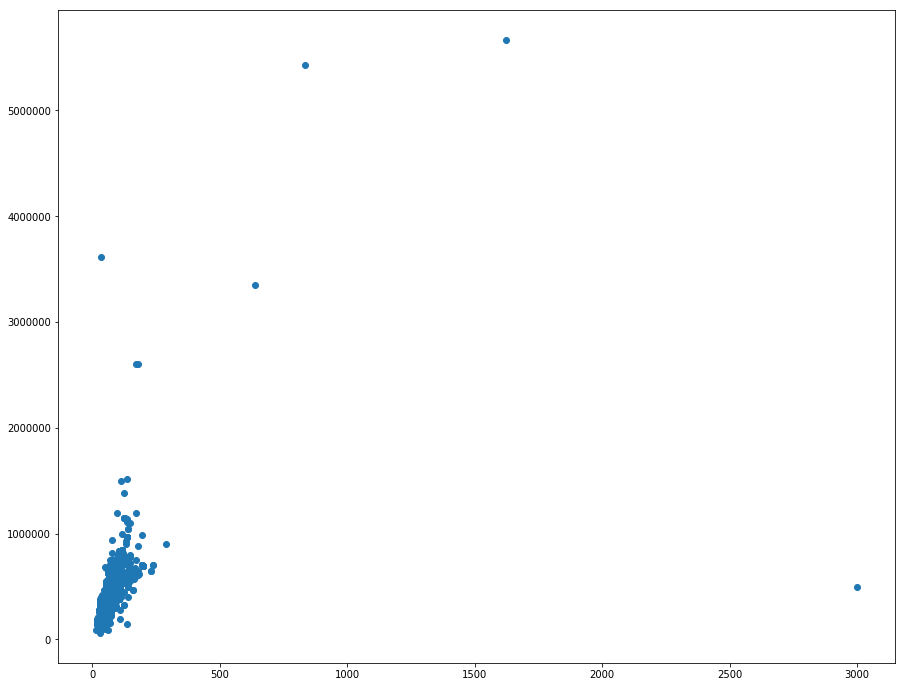

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.scatter(x = dane1.powierzchnia, y = dane1.cena)

usuwam tzw. outlayeroww czyli oferty, ktorych cena przekracza 2 mio

In [0]:
dane1.drop(dane1[(dane1['cena'] > 2000000)].index, inplace = True)


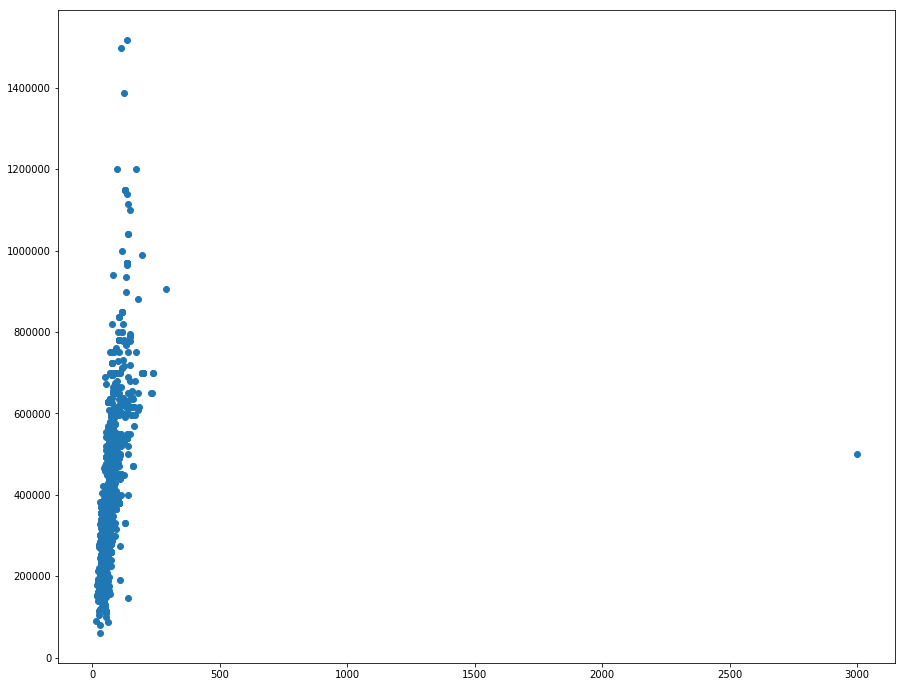

In [5]:
plt.figure(figsize=(15,12))
plt.scatter(x = dane1.powierzchnia, y = dane1.cena)

In [0]:
dane1.drop(dane1[(dane1['powierzchnia'] > 500)].index, inplace = True)


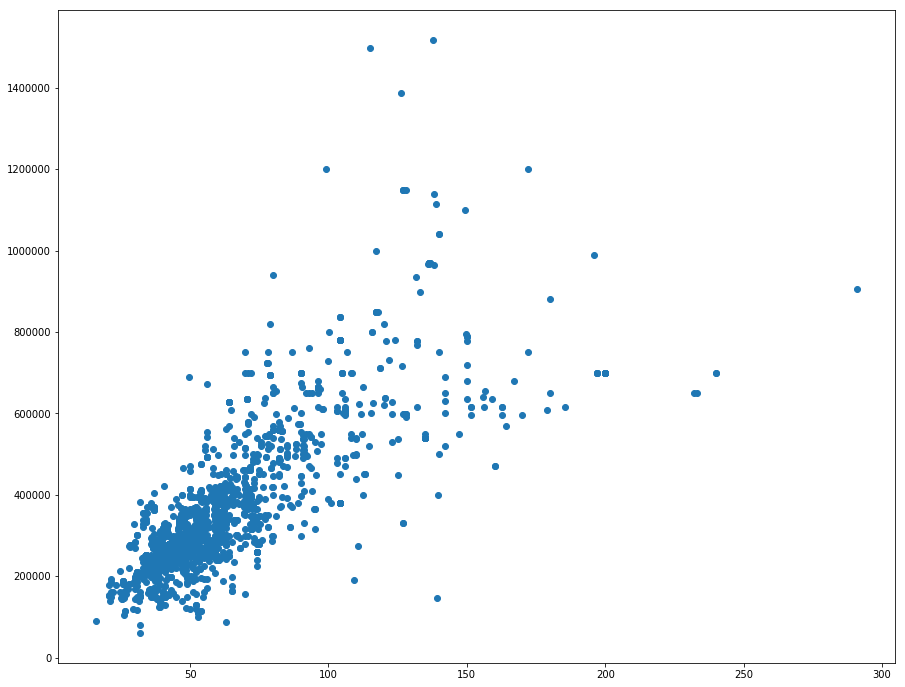

In [7]:
plt.figure(figsize=(15,12))
plt.scatter(x = dane1.powierzchnia, y = dane1.cena)

usuwam oferty o powierzchni powyzej  250 m2 

In [0]:
dane1.drop(dane1[(dane1['powierzchnia'] > 250)].index, inplace = True)


usuwam oferty z cena powyzej 1,4 mio

In [0]:
dane1.drop(dane1[(dane1['cena'] > 1400000)].index, inplace = True)


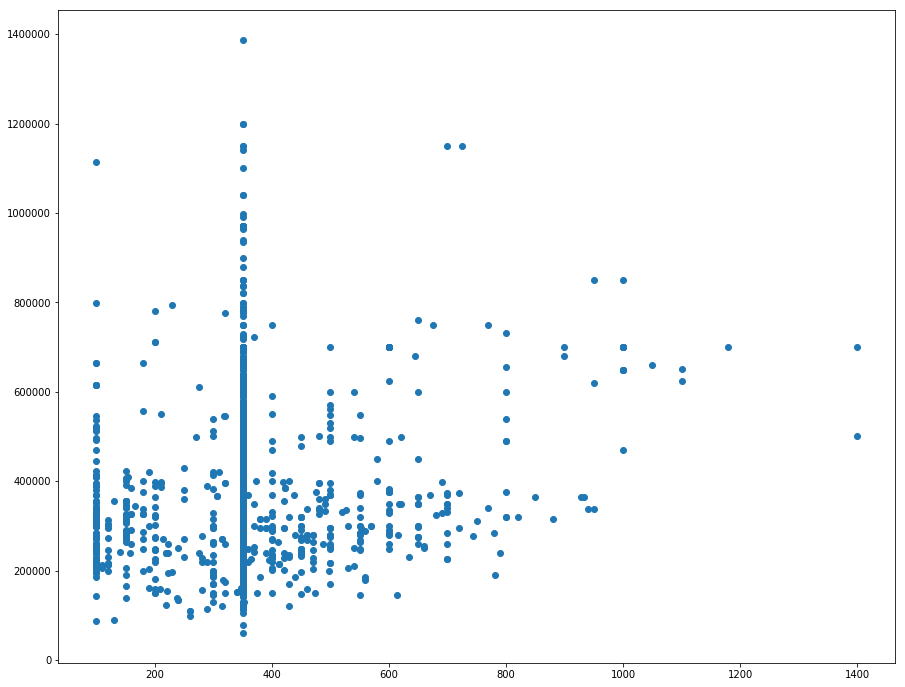

In [10]:
plt.figure(figsize=(15,12))
plt.scatter(x = dane1.czynsz, y = dane1.cena)

kolejnymi outlayerami sa oferty z czynszem powyzej 1.200

In [0]:
dane1.drop(dane1[(dane1['czynsz'] > 1200)].index, inplace = True)

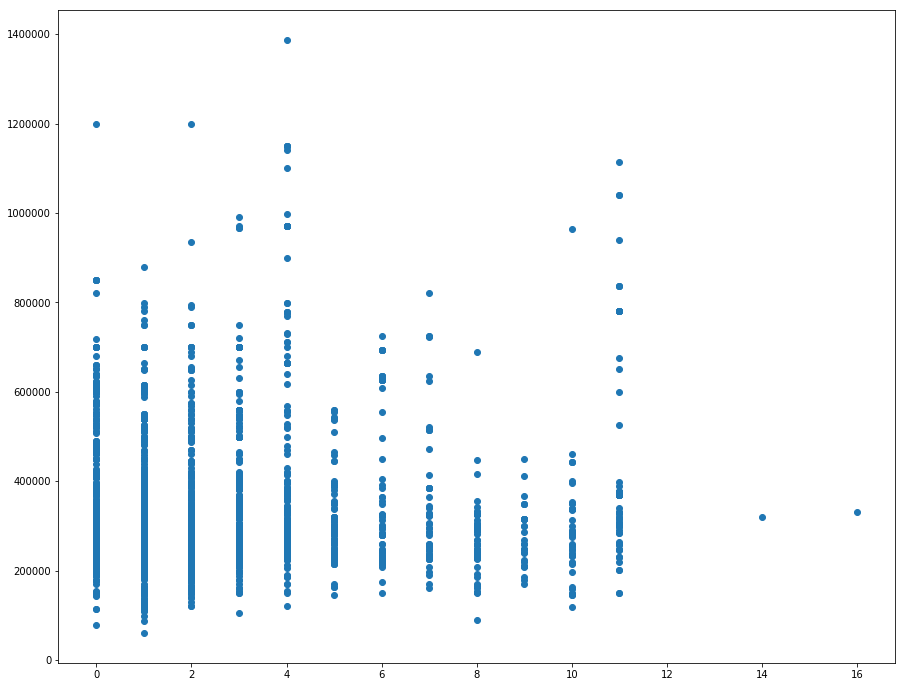

In [12]:
plt.figure(figsize=(15,12))
plt.scatter(x = dane1.pietro, y = dane1.cena)

usuwam rowniez oferty na pietrach powyzej 12-tego

In [0]:
dane1.drop(dane1[(dane1['pietro'] > 12)].index, inplace = True)

In [14]:
corr_matrix = dane1.corr()
corr_matrix['cena']

Unnamed: 0       0.109476
cena             1.000000
czynsz           0.178444
liczba_pieter   -0.130028
liczba_pokoi     0.648012
pietro          -0.003445
powierzchnia     0.788074
wiek             0.090922
Name: cena, dtype: float64

In [15]:

import numpy as np


dane4 = pd.get_dummies(dane1)

dane4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 0 to 2175
Data columns (total 37 columns):
Unnamed: 0                                   2162 non-null int64
cena                                         2162 non-null float64
czynsz                                       2162 non-null float64
liczba_pieter                                2162 non-null int64
liczba_pokoi                                 2162 non-null int64
pietro                                       2162 non-null float64
powierzchnia                                 2162 non-null float64
wiek                                         2162 non-null int64
forma_wlasnosci_pelna_wlasnosc               2162 non-null uint8
forma_wlasnosci_spoldzielcze_wl._z_kw        2162 non-null uint8
forma_wlasnosci_spoldzielcze_wlasnosciowe    2162 non-null uint8
forma_wlasnosci_udzial                       2162 non-null uint8
material_budynku_beton                       2162 non-null uint8
material_budynku_cegla                  

In [0]:
dane4 = dane4.drop(['Unnamed: 0'], axis=1)

In [0]:
X = dane4.drop(['cena'], axis=1)
y = dane4['cena'].astype(int)

In [0]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold 
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn import  metrics

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Skaluje dane uzywajac Standard Scallera

In [0]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Redukuje wymiary danych

In [0]:
pca = PCA(n_components = 15)

pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Pierwszy model to Linear Regression

In [25]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
kfold = model_selection.KFold(n_splits=10, random_state=42)
grid_1 = GridSearchCV(pipe,
              param_grid={'polynomialfeatures__degree': [1, 2, 3]},
              cv=kfold,
              refit=True)
grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
print("Best score: %0.3f" % grid_1.best_score_)
print(grid_1.best_estimator_)



{'polynomialfeatures__degree': 1}
Best score: 0.425
Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_1.predict(X_train))}")
print(f"mean^2 error train MSE: {mean_squared_error(y_true=y_train, y_pred=grid_1.predict(X_train))}")
print(f"meanABS error train MAE: {mean_absolute_error(y_true=y_train, y_pred=grid_1.predict(X_train))}")
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_1.predict(X_test))}")
print(f"mean^2 error test MSE: {mean_squared_error(y_true=y_test, y_pred=grid_1.predict(X_test))}")
print(f"meanABS error test MAE: {mean_absolute_error(y_true=y_test, y_pred=grid_1.predict(X_test))}")


R^2 train: 0.6090492158683576
mean^2 error train MSE: 9996355026.276125
meanABS error train MAE: 68898.26848072793
R^2 test: 0.5552769629912666
mean^2 error test MSE: 13317409116.767984
meanABS error test MAE: 75364.17545221544


Drugi to RandomForest

In [27]:
grid_2 = GridSearchCV(RandomForestRegressor(n_jobs = -1, max_features = 'sqrt', n_estimators = 50, oob_score = True),
              param_grid={
                   'n_estimators': [300, 500, 700],
                    'max_features': ['auto', 'sqrt', 'log2'],  
                    'max_depth': [200, 300, 400]
                   },
              cv=5,
              refit=True)
grid_2.fit(X_train, y_train)
print(grid_2.best_params_)
print("Best score: %0.3f" % grid_2.best_score_)
print(grid_2.best_estimator_)


{'max_depth': 300, 'max_features': 'log2', 'n_estimators': 500}
Best score: 0.756
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=300,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)


In [28]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_2.predict(X_train))}")
print(f"mean^2 error train MSE: {mean_squared_error(y_true=y_train, y_pred=grid_2.predict(X_train))}")
print(f"meanABS error train MAE: {mean_absolute_error(y_true=y_train, y_pred=grid_2.predict(X_train))}")
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_2.predict(X_test))}")
print(f"mean^2 error test MSE: {mean_squared_error(y_true=y_test, y_pred=grid_2.predict(X_test))}")
print(f"meanABS error test MAE: {mean_absolute_error(y_true=y_test, y_pred=grid_2.predict(X_test))}")

R^2 train: 0.9677088091161389
mean^2 error train MSE: 825664562.9022065
meanABS error train MAE: 15648.454404531294
R^2 test: 0.7739050405794061
mean^2 error test MSE: 6770503939.025707
meanABS error test MAE: 42300.56057530925


Trzeci to Lasso

In [29]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                    'lasso__alpha': [0.1, 0.2, 0.3, 0.5]},
                    cv=5,
                    refit=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_
print("Best score: %0.3f" % grid_3.best_score_)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4006484487852.479, tolerance: 3494127295085.1816
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4010165875547.722, tolerance: 3368963913157.2056
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4094724120835.776, tolerance: 3626366705596.523
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4104730855181.

Best score: 0.460


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_3.predict(X_train))}")
print(f"mean^2 error train MSE: {mean_squared_error(y_true=y_train, y_pred=grid_3.predict(X_train))}")
print(f"meanABS error train MAE: {mean_absolute_error(y_true=y_train, y_pred=grid_3.predict(X_train))}")
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_3.predict(X_test))}")
print(f"mean^2 error test MSE: {mean_squared_error(y_true=y_test, y_pred=grid_3.predict(X_test))}")
print(f"meanABS error test MAE: {mean_absolute_error(y_true=y_test, y_pred=grid_3.predict(X_test))}")

R^2 train: 0.6090492157621537
mean^2 error train MSE: 9996355028.991693
meanABS error train MAE: 68898.17338603
R^2 test: 0.5552763778630354
mean^2 error test MSE: 13317426638.666765
meanABS error test MAE: 75364.07685281205


Czwarty to Ridge

In [31]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_
print("Best score: %0.3f" % grid_4.best_score_)
print(grid_4.best_estimator_)

Best score: 0.466
Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.1))],
         verbose=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_4.predict(X_train))}")
print(f"mean^2 error train MSE: {mean_squared_error(y_true=y_train, y_pred=grid_4.predict(X_train))}")
print(f"meanABS error train MAE: {mean_absolute_error(y_true=y_train, y_pred=grid_4.predict(X_train))}")
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_4.predict(X_test))}")
print(f"mean^2 error test MSE: {mean_squared_error(y_true=y_test, y_pred=grid_4.predict(X_test))}")
print(f"meanABS error test MAE: {mean_absolute_error(y_true=y_test, y_pred=grid_4.predict(X_test))}")

R^2 train: 0.6090484123060216
mean^2 error train MSE: 9996375572.8378
meanABS error train MAE: 68890.14093601475
R^2 test: 0.5552724456347369
mean^2 error test MSE: 13317544390.815033
meanABS error test MAE: 75350.62388034404


piaty to XGBoost - niestety nawet na colabie nie udalo sie tego przeliczyc - w zwiazku z tym przerwalam proces i zrezygnowalam z przeliczen tym modelem

In [34]:
params = {'learning_rate':[0.5, 0.6, 0.7], 'reg_lambda':[0.7, 1, 1.2], 
          'reg_alpha':[0.5, 0.75, 1], 'max_depth':[3, 5, 7], 'subsample':[0.3, 0.5, 0.6]}
xg_r = xgb.XGBClassifier(random_state=42)
grid_5 = GridSearchCV(estimator=xg_r, param_grid=params, cv=5)
grid_5.fit(X_train, y_train)

grid_5.best_params_
print("Best score: %0.3f" % grid_5.best_score_)
print(grid_5.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: ignored

In [0]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_5.predict(X_train))}")
print(f"mean^2 error train MSE: {mean_squared_error(y_true=y_train, y_pred=grid_5.predict(X_train))}")
print(f"meanABS error train MAE: {mean_absolute_error(y_true=y_train, y_pred=grid_5.predict(X_train))}")
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_5.predict(X_test))}")
print(f"mean^2 error test MSE: {mean_squared_error(y_true=y_test, y_pred=grid_5.predict(X_test))}")
print(f"meanABS error test MAE: {mean_absolute_error(y_true=y_test, y_pred=grid_5.predict(X_test))}")

In [37]:
models = []
models.append(('LinearRegression', grid_1.best_estimator_))
models.append(('RandomForestRegressor', grid_2.best_estimator_))
models.append(('Lasso', grid_3.best_estimator_))
models.append(('Ridge', grid_4.best_estimator_))
#models.append(('XGB', xgb_r.best_estimator_))

r2_train = []
explained_variance_score_train = []
mean_squared_error_train= []
mean_absolute_error_train = []
r2_test = []
explained_variance_score_test = []
mean_squared_error_test = []
mean_absolute_error_test = []
for name, model in models:
    print(name)
    print("R^2_train: {}".format(metrics.r2_score(y_train, model.predict(X_train)) ))
    print("Explained variance score_train: {}".format( metrics.explained_variance_score(y_train, model.predict(X_train)) ))
    print("Mean squared error_train: {}".format( metrics.mean_squared_error(y_train, model.predict(X_train)) ))
    print("Mean absolute errors_train: {}".format(metrics.mean_absolute_error(y_train, model.predict(X_train)) ))
    print("R^2_test: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score_test: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Mean squared error_test: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errorsTest: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2_train.append(metrics.r2_score(y_train, model.predict(X_train)))
    explained_variance_score_train.append(metrics.explained_variance_score(y_train, model.predict(X_train)))
    mean_squared_error_train.append(metrics.mean_squared_error(y_train, model.predict(X_train)))
    mean_absolute_error_train.append(metrics.mean_absolute_error(y_train, model.predict(X_train)))
    r2_test.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score_test.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    mean_squared_error_test.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error_test.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))
    

LinearRegression
R^2_train: 0.6090492158683576
Explained variance score_train: 0.6090492158683576
Mean squared error_train: 9996355026.276125
Mean absolute errors_train: 68898.26848072793
R^2_test: 0.5552769629912666
Explained variance score_test: 0.5579606395182374
Mean squared error_test: 13317409116.767984
Mean absolute errorsTest: 75364.17545221544
RandomForestRegressor
R^2_train: 0.9677088091161389
Explained variance score_train: 0.9677120008392202
Mean squared error_train: 825664562.9022065
Mean absolute errors_train: 15648.45440453129
R^2_test: 0.7739050405794061
Explained variance score_test: 0.776752007877439
Mean squared error_test: 6770503939.025707
Mean absolute errorsTest: 42300.56057530925
Lasso
R^2_train: 0.6090492157621537
Explained variance score_train: 0.6090492157621537
Mean squared error_train: 9996355028.991693
Mean absolute errors_train: 68898.17338603
R^2_test: 0.5552763778630354
Explained variance score_test: 0.5579600953784842
Mean squared error_test: 133174266

In [40]:
d = {'r2 train': r2_train,
     'r2 test': r2_test, 
     'explained_variance_score_train': explained_variance_score_train,
     'explained_variance_score_test': explained_variance_score_test, 
     'mean_squared_error_train' : mean_squared_error_train,
     'mean_squared_error_test' : mean_squared_error_test,
     'mean_absolute_error_train' : mean_absolute_error_train,
     'mean_absolute_error_test' : mean_absolute_error_test,
    }
porownanie = pd.DataFrame(data=d)
porownanie.insert(loc=0, column='Method', value=['LinearRegression','RandomForestRegressor','Lasso','Ridge'])
porownanie

,Method,r2 train,r2 test,explained_variance_score_train,explained_variance_score_test,mean_squared_error_train,mean_squared_error_test,mean_absolute_error_train,mean_absolute_error_test
0,LinearRegression,0.609049,0.555277,0.609049,0.557961,9.996355e+09,1.331741e+10,68898.268481,75364.175452
1,RandomForestRegressor,0.967709,0.773905,0.967712,0.776752,8.256646e+08,6.770504e+09,15648.454405,42300.560575
2,Lasso,0.609049,0.555276,0.609049,0.557960,9.996355e+09,1.331743e+10,68898.173386,75364.076853
3,Ridge,0.609048,0.555272,0.609048,0.557957,9.996376e+09,1.331754e+10,68890.140936,75350.623880


### Z analizy powyzszego porownania wynika, ze najlepsze wyniki daje model Random Forest Regressor, poniewaz r2 czyli wlasciwie dopasowania modeli do danych (w jakim stopniu wariancja zmiennych jest wyjasniona przez model) jest najwyzszy zarowno na bazie treningowej jak i testowej oraz bledy modelu sa najnizsze

In [41]:
dane4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 0 to 2175
Data columns (total 36 columns):
cena                                         2162 non-null float64
czynsz                                       2162 non-null float64
liczba_pieter                                2162 non-null int64
liczba_pokoi                                 2162 non-null int64
pietro                                       2162 non-null float64
powierzchnia                                 2162 non-null float64
wiek                                         2162 non-null int64
forma_wlasnosci_pelna_wlasnosc               2162 non-null uint8
forma_wlasnosci_spoldzielcze_wl._z_kw        2162 non-null uint8
forma_wlasnosci_spoldzielcze_wlasnosciowe    2162 non-null uint8
forma_wlasnosci_udzial                       2162 non-null uint8
material_budynku_beton                       2162 non-null uint8
material_budynku_cegla                       2162 non-null uint8
material_budynku_drewno                 

In [0]:
X1 = dane4.drop(['cena'], axis=1)
y1 = dane4['cena'].astype(int)

In [0]:
scaler = StandardScaler()

scaler.fit(X1)
X1 = scaler.transform(X1)


In [0]:
pca = PCA(n_components = 15)

pca.fit(X1)
X1 = pca.transform(X1)


In [0]:
y_LR = grid_1.predict(X1)

In [0]:
y_RFR = grid_2.predict(X1)

In [0]:
y_Lasso = grid_3.predict(X1)

In [0]:
y_Ridge = grid_4.predict(X1)

In [0]:
import pandas as pd
X1_df = pd.DataFrame(X1)
y_LR_df = pd.DataFrame(y_LR)
y1_df = pd.DataFrame(y1)

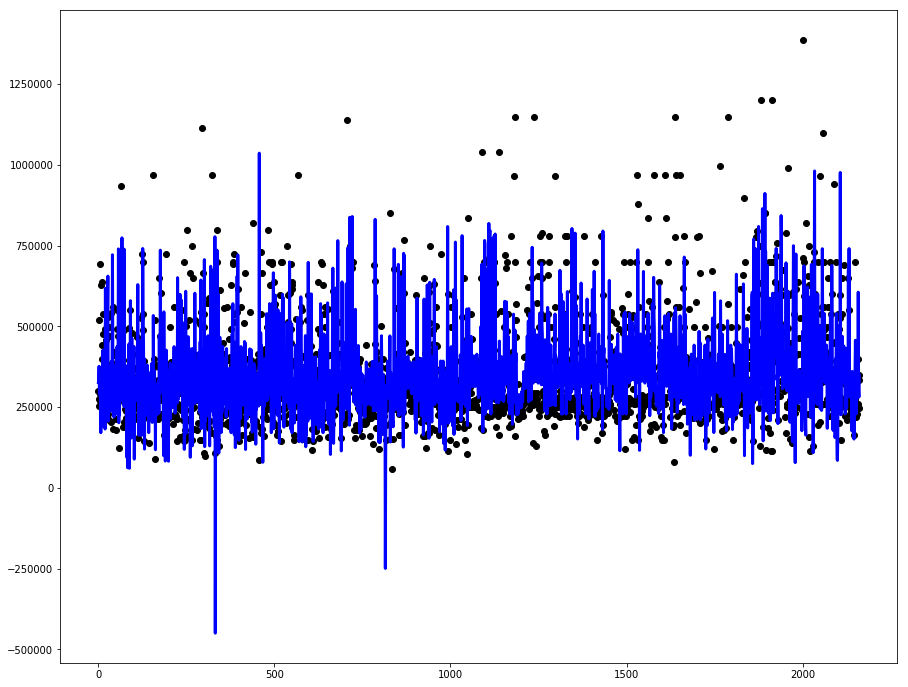

In [61]:
plt.figure(figsize=(15,12))
plt.scatter(X1_df.index, y1_df,  color='black')
plt.plot(X1_df.index, y_LR_df, color='blue', linewidth=3)
plt.show()

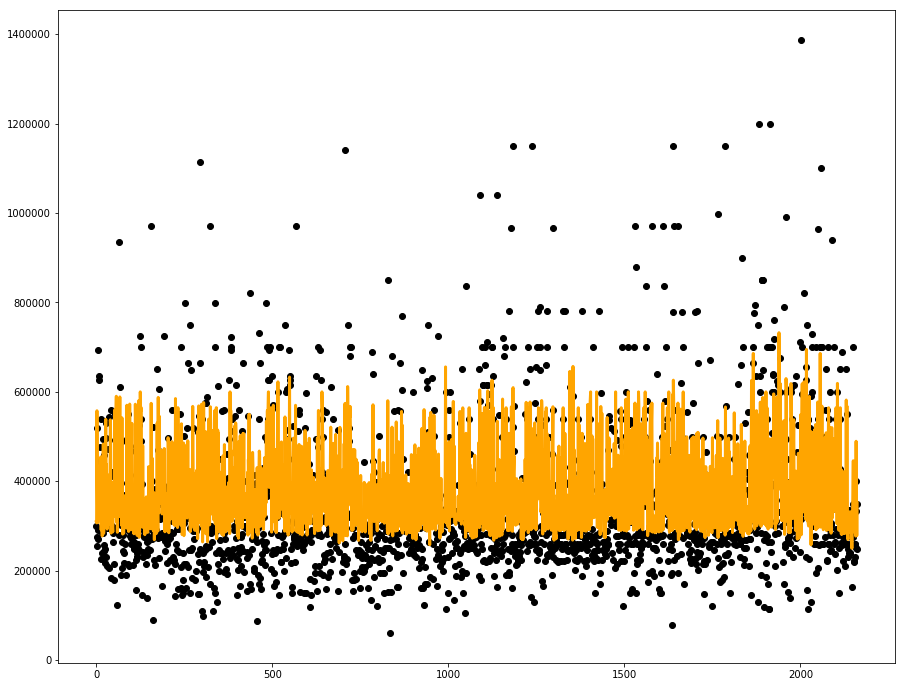

In [62]:
y_RFR_df = pd.DataFrame(y_RFR)

plt.figure(figsize=(15,12))
plt.scatter(X1_df.index, y1_df,  color='black')
plt.plot(X1_df.index, y_RFR_df, color='orange', linewidth=3)
plt.show()

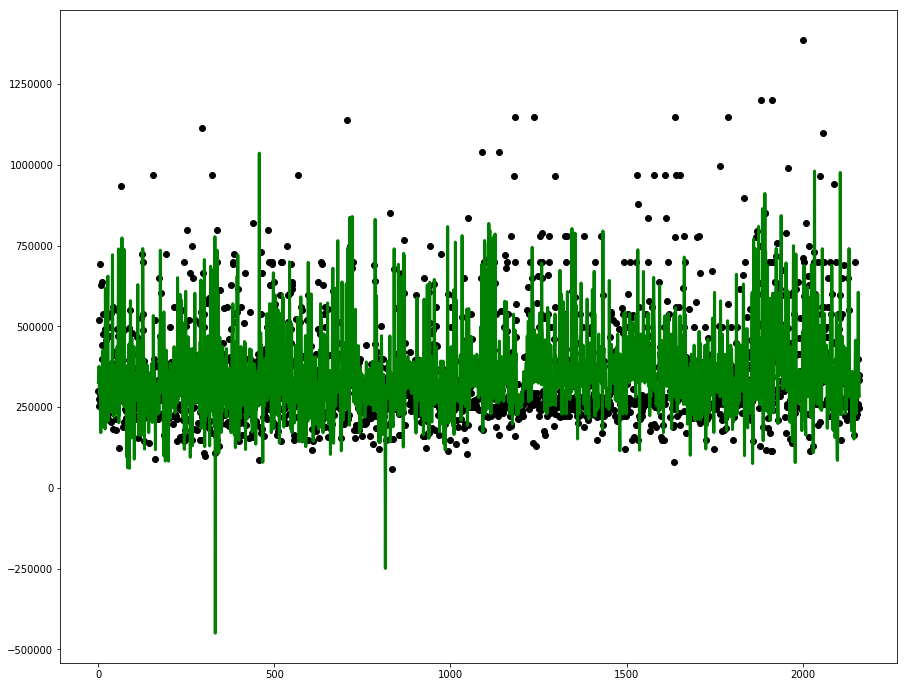

In [63]:
y_Lasso_df = pd.DataFrame(y_Lasso)
plt.figure(figsize=(15,12))
plt.scatter(X1_df.index, y1_df,  color='black')
plt.plot(X1_df.index, y_Lasso_df, color='green', linewidth=3)
plt.show()

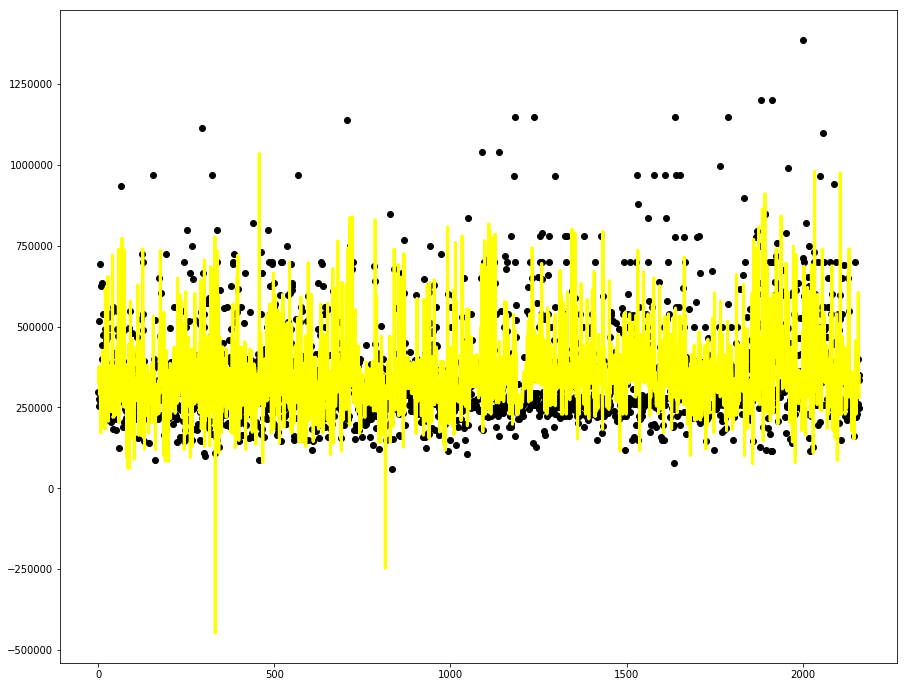

In [65]:
y_Ridge_df = pd.DataFrame(y_Ridge)
plt.figure(figsize=(15,12))
plt.scatter(X1_df.index, y1_df,  color='black')
plt.plot(X1_df.index, y_Ridge_df, color='yellow', linewidth=3)
plt.show()

In [70]:
porown_y = pd.concat([y1_df, y_LR_df, y_RFR_df, y_Lasso_df, y_Ridge_df], axis=1)
porown_y.columns = ['cena', 'pred_LR', 'pred_RFR', 'pred_Lasso', 'pred_Ridge']
porown_y

,cena,pred_LR,pred_RFR,pred_Lasso,pred_Ridge
0,299000.0,326325.709962,309431.839000,326326.110327,326347.534813
1,275709.0,336027.987734,306698.566190,336027.935534,336025.308149
2,518891.0,376614.394866,557499.816384,376613.111492,376517.153909
3,255000.0,290261.513059,391915.422667,290261.677787,290300.595570
4,290457.0,337097.971153,307100.030190,337097.903478,337093.983853
5,270000.0,359423.509293,331543.656605,359423.319500,359386.997912
6,693528.0,223467.892944,399418.590000,223471.313063,223655.220537
7,627200.0,171145.064921,385900.012000,171149.294409,171401.232403
8,337994.0,358913.281809,343881.377667,358913.158566,358886.993630
9,636300.0,213377.700476,396803.132000,213381.266529,213577.360122
